# Project: Wrangling and Analyze Data

Giuseppe Bulgarelli,
27.01.2023

## Table of Contents
<ul>
 <li><a href="#gathering">Data Gathering</a></li>
 <li><a href="#assessing">Assessing Data</a></li>
   <ul>
     <li><a href="#visual">Visual Assessment</a></li>
     <li><a href="#programmatic">Programmatic Assessment</a></li>
     <li><a href="#summary">Quality Assessment</a></li>
   </ul>
 <li><a href="#cleaning">Cleaning Data</a></li>
 <li><a href="#storing">Storing Data</a></li>
 <li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
 <li><a href="#conclusions">Conclusions</a></li>
</ul>


In [202]:
# Let's import all useful libraries for this project

import pandas as pd
import numpy as np
import requests
from dotenv import load_dotenv
from tweepy import OAuthHandler
from timeit import default_timer as timer
import tweepy
import datetime
import os
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import PIL.Image
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

<a id='gathering'></a>
### Data Gathering

####  1. Import the WeRateDogs Twitter archive: ''twitter-archive-enhanced.csv''

In [203]:
# Read csv file and import it to a dataframe
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [204]:
# Let's not truncate data in cells
# Let's use the following display option:
# display.max_columns sets the maximum number of columns displayed.
pd.options.display.max_columns
df_twitter.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

In [205]:
# Let's show the dimensionality of the DataFrame, it means the number of rows and columns
df_twitter.shape

(2356, 17)

In [206]:
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

2356

#### 2.  Programmatic download of the  'image-predictions.tsv' into a dataframe

In [207]:
file_name = 'image-predictions.tsv'

# Recover data if file if doesn't exist
if not os.path.isfile(file_name):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)

In [208]:
# Save the response to 'image-predictions.tsv' file if it doesn't exist
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [209]:
# Load the 'image-predictions.tsv' file into a dataframe
# Read in tsv file in pandas dataframe
df_image = pd.read_csv(file_name, sep='\t')

In [210]:
df_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [211]:
df_image.shape

(2075, 12)

In [212]:
# Since the basic tweet data doesn't not contain any information regarding hte number of likes/favorites, 
# let's try to get this information using twitter API.
# In order to use Twitter API, a request as developer app from Twitter is submitted and obtained.

# Create a .env file with the environment variables and import the environment variables
load_dotenv(".env")

# Authentication Details: load personal API keys (replaced with placeholders)
consumer_key = os.environ.get('consumer_key')
consumer_secret = os.environ.get('consumer_secret')
access_token = os.environ.get('access_token')
access_secret = os.environ.get('access_secret')


In [213]:
# Get the API object which we will use to gather the twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [214]:
# Import every tweet JSON data into 'tweet_json.txt' as a separate line

file_name = 'tweet_json.txt'

# Create a file, remove previous one if exists
# open(file_name, 'w').close()

# Create a file if it doesn't exist
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

In [215]:
# Let's create an empty dictionary to fullfill with tweets which cannot be found
tweet_errors = {}

current_tweet_number = 0
tweet_data = []

# Let's use timer function to monitor the execution time of the following codes.
start = timer()

# Save each tweet JSON data as a new line in the .txt file
# Let's use “With” statement to get better syntax and exception handling.
# The statement returns a file pointer that is assigned to the variable “file”. 
# Once all the statements are executed and the execution reaches the end of the with context block, 
# the file is automatically closed. Also, if the program runs into any exception inside the with block, 
# the with open context in python closes the file before terminating the program. 
# In this way the data inside the file remains safe even if the program is terminated abruptly.
with open(file_name, mode = 'w') as file:
    for tweet_id in tweet_ids:
        # Increment current_tweet_number
        current_tweet_number += 1
        try:
            # Start stamp
            print('-'*10)
            # By using datetime.now() let's retrieve information about the current date and time which includes
            # the current year, month, day, and time at that moment
            print('{} started at {}. tweet_id -> {}'.format(current_tweet_number, datetime.datetime.now(), tweet_id))
            # Let's use API.get_status() method of the API class in Tweepy module to get a status/tweet
            # tweet_mode='extended' is used to avoid tweet truncation 
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # Convert each tweet status to JSON string and save it in the "file"
            # Python supports JSON through a built-in package called json. 
            # The dump() method is below used to store the Python objects in the "file".
            json.dump(tweet._json, file)
            file.write('\n')
            print('{} completed at {}'.format(current_tweet_number, datetime.datetime.now()))
        except Exception as e:
            print(' -> {} EXCEPTION at {}'.format(current_tweet_number, datetime.datetime.now()))
            tweet_errors[str(tweet_id)] = str(e)
end = timer()

print(end - start)
print(tweet_errors)


----------
1 started at 2023-01-30 17:28:25.116872. tweet_id -> 892420643555336193
1 completed at 2023-01-30 17:28:25.373543
----------
2 started at 2023-01-30 17:28:25.373543. tweet_id -> 892177421306343426
2 completed at 2023-01-30 17:28:25.663167
----------
3 started at 2023-01-30 17:28:25.663167. tweet_id -> 891815181378084864
3 completed at 2023-01-30 17:28:25.962539
----------
4 started at 2023-01-30 17:28:25.963538. tweet_id -> 891689557279858688
4 completed at 2023-01-30 17:28:26.209442
----------
5 started at 2023-01-30 17:28:26.210440. tweet_id -> 891327558926688256
5 completed at 2023-01-30 17:28:26.478123
----------
6 started at 2023-01-30 17:28:26.478123. tweet_id -> 891087950875897856
6 completed at 2023-01-30 17:28:26.755622
----------
7 started at 2023-01-30 17:28:26.756625. tweet_id -> 890971913173991426
7 completed at 2023-01-30 17:28:27.010869
----------
8 started at 2023-01-30 17:28:27.010869. tweet_id -> 890729181411237888
8 completed at 2023-01-30 17:28:27.279561


65 completed at 2023-01-30 17:28:42.099670
----------
66 started at 2023-01-30 17:28:42.100670. tweet_id -> 879492040517615616
66 completed at 2023-01-30 17:28:42.338049
----------
67 started at 2023-01-30 17:28:42.338049. tweet_id -> 879415818425184262
67 completed at 2023-01-30 17:28:42.587942
----------
68 started at 2023-01-30 17:28:42.587942. tweet_id -> 879376492567855104
68 completed at 2023-01-30 17:28:42.826723
----------
69 started at 2023-01-30 17:28:42.826723. tweet_id -> 879130579576475649
69 completed at 2023-01-30 17:28:43.084976
----------
70 started at 2023-01-30 17:28:43.085976. tweet_id -> 879050749262655488
70 completed at 2023-01-30 17:28:43.330114
----------
71 started at 2023-01-30 17:28:43.330114. tweet_id -> 879008229531029506
71 completed at 2023-01-30 17:28:43.642053
----------
72 started at 2023-01-30 17:28:43.642053. tweet_id -> 878776093423087618
72 completed at 2023-01-30 17:28:43.882183
----------
73 started at 2023-01-30 17:28:43.882183. tweet_id -> 878

129 completed at 2023-01-30 17:28:58.315615
----------
130 started at 2023-01-30 17:28:58.316614. tweet_id -> 867421006826221569
130 completed at 2023-01-30 17:28:58.580634
----------
131 started at 2023-01-30 17:28:58.580634. tweet_id -> 867072653475098625
131 completed at 2023-01-30 17:28:58.831676
----------
132 started at 2023-01-30 17:28:58.831676. tweet_id -> 867051520902168576
132 completed at 2023-01-30 17:28:59.082336
----------
133 started at 2023-01-30 17:28:59.082336. tweet_id -> 866816280283807744
 -> 133 EXCEPTION at 2023-01-30 17:28:59.306527
----------
134 started at 2023-01-30 17:28:59.306527. tweet_id -> 866720684873056260
134 completed at 2023-01-30 17:28:59.562333
----------
135 started at 2023-01-30 17:28:59.563333. tweet_id -> 866686824827068416
135 completed at 2023-01-30 17:28:59.801458
----------
136 started at 2023-01-30 17:28:59.801458. tweet_id -> 866450705531457537
136 completed at 2023-01-30 17:29:00.065882
----------
137 started at 2023-01-30 17:29:00.065

193 completed at 2023-01-30 17:29:14.522989
----------
194 started at 2023-01-30 17:29:14.522989. tweet_id -> 855459453768019968
194 completed at 2023-01-30 17:29:14.811673
----------
195 started at 2023-01-30 17:29:14.811673. tweet_id -> 855245323840757760
195 completed at 2023-01-30 17:29:15.070272
----------
196 started at 2023-01-30 17:29:15.070272. tweet_id -> 855138241867124737
196 completed at 2023-01-30 17:29:15.335838
----------
197 started at 2023-01-30 17:29:15.336831. tweet_id -> 854732716440526848
197 completed at 2023-01-30 17:29:15.597362
----------
198 started at 2023-01-30 17:29:15.598366. tweet_id -> 854482394044301312
198 completed at 2023-01-30 17:29:15.892841
----------
199 started at 2023-01-30 17:29:15.893842. tweet_id -> 854365224396361728
199 completed at 2023-01-30 17:29:16.165648
----------
200 started at 2023-01-30 17:29:16.165648. tweet_id -> 854120357044912130
200 completed at 2023-01-30 17:29:16.404648
----------
201 started at 2023-01-30 17:29:16.404648.

257 completed at 2023-01-30 17:29:30.921637
----------
258 started at 2023-01-30 17:29:30.921637. tweet_id -> 843856843873095681
258 completed at 2023-01-30 17:29:31.168171
----------
259 started at 2023-01-30 17:29:31.169171. tweet_id -> 843604394117681152
259 completed at 2023-01-30 17:29:31.408990
----------
260 started at 2023-01-30 17:29:31.409989. tweet_id -> 843235543001513987
260 completed at 2023-01-30 17:29:31.648903
----------
261 started at 2023-01-30 17:29:31.649903. tweet_id -> 842892208864923648
 -> 261 EXCEPTION at 2023-01-30 17:29:31.885656
----------
262 started at 2023-01-30 17:29:31.885656. tweet_id -> 842846295480000512
262 completed at 2023-01-30 17:29:32.141753
----------
263 started at 2023-01-30 17:29:32.141753. tweet_id -> 842765311967449089
263 completed at 2023-01-30 17:29:32.371708
----------
264 started at 2023-01-30 17:29:32.372248. tweet_id -> 842535590457499648
264 completed at 2023-01-30 17:29:32.616588
----------
265 started at 2023-01-30 17:29:32.616

321 completed at 2023-01-30 17:29:47.153879
----------
322 started at 2023-01-30 17:29:47.153879. tweet_id -> 834209720923721728
322 completed at 2023-01-30 17:29:47.407016
----------
323 started at 2023-01-30 17:29:47.407016. tweet_id -> 834167344700198914
323 completed at 2023-01-30 17:29:47.664818
----------
324 started at 2023-01-30 17:29:47.664818. tweet_id -> 834089966724603904
324 completed at 2023-01-30 17:29:47.919837
----------
325 started at 2023-01-30 17:29:47.919837. tweet_id -> 834086379323871233
325 completed at 2023-01-30 17:29:48.163855
----------
326 started at 2023-01-30 17:29:48.163855. tweet_id -> 833863086058651648
326 completed at 2023-01-30 17:29:48.400967
----------
327 started at 2023-01-30 17:29:48.401966. tweet_id -> 833826103416520705
327 completed at 2023-01-30 17:29:48.644911
----------
328 started at 2023-01-30 17:29:48.644911. tweet_id -> 833732339549220864
328 completed at 2023-01-30 17:29:48.921149
----------
329 started at 2023-01-30 17:29:48.921149.

385 completed at 2023-01-30 17:30:03.449823
----------
386 started at 2023-01-30 17:30:03.449823. tweet_id -> 826848821049180160
386 completed at 2023-01-30 17:30:03.730523
----------
387 started at 2023-01-30 17:30:03.730523. tweet_id -> 826615380357632002
387 completed at 2023-01-30 17:30:04.034158
----------
388 started at 2023-01-30 17:30:04.034158. tweet_id -> 826598799820865537
388 completed at 2023-01-30 17:30:04.286869
----------
389 started at 2023-01-30 17:30:04.286869. tweet_id -> 826598365270007810
389 completed at 2023-01-30 17:30:04.545611
----------
390 started at 2023-01-30 17:30:04.545611. tweet_id -> 826476773533745153
390 completed at 2023-01-30 17:30:04.802957
----------
391 started at 2023-01-30 17:30:04.803936. tweet_id -> 826240494070030336
391 completed at 2023-01-30 17:30:05.076549
----------
392 started at 2023-01-30 17:30:05.076549. tweet_id -> 826204788643753985
392 completed at 2023-01-30 17:30:05.318033
----------
393 started at 2023-01-30 17:30:05.319034.

449 completed at 2023-01-30 17:30:20.024844
----------
450 started at 2023-01-30 17:30:20.025844. tweet_id -> 819004803107983360
450 completed at 2023-01-30 17:30:20.264583
----------
451 started at 2023-01-30 17:30:20.264583. tweet_id -> 818646164899774465
451 completed at 2023-01-30 17:30:20.521815
----------
452 started at 2023-01-30 17:30:20.522817. tweet_id -> 818627210458333184
452 completed at 2023-01-30 17:30:20.762001
----------
453 started at 2023-01-30 17:30:20.762001. tweet_id -> 818614493328580609
453 completed at 2023-01-30 17:30:21.016665
----------
454 started at 2023-01-30 17:30:21.016665. tweet_id -> 818588835076603904
454 completed at 2023-01-30 17:30:21.267883
----------
455 started at 2023-01-30 17:30:21.267883. tweet_id -> 818536468981415936
455 completed at 2023-01-30 17:30:21.517817
----------
456 started at 2023-01-30 17:30:21.517817. tweet_id -> 818307523543449600
456 completed at 2023-01-30 17:30:21.800275
----------
457 started at 2023-01-30 17:30:21.800275.

513 completed at 2023-01-30 17:30:36.334413
----------
514 started at 2023-01-30 17:30:36.334413. tweet_id -> 811647686436880384
514 completed at 2023-01-30 17:30:36.578677
----------
515 started at 2023-01-30 17:30:36.578677. tweet_id -> 811627233043480576
515 completed at 2023-01-30 17:30:36.844774
----------
516 started at 2023-01-30 17:30:36.845774. tweet_id -> 811386762094317568
516 completed at 2023-01-30 17:30:37.096408
----------
517 started at 2023-01-30 17:30:37.097406. tweet_id -> 810984652412424192
517 completed at 2023-01-30 17:30:37.350477
----------
518 started at 2023-01-30 17:30:37.351476. tweet_id -> 810896069567610880
518 completed at 2023-01-30 17:30:37.600010
----------
519 started at 2023-01-30 17:30:37.600010. tweet_id -> 810657578271330305
519 completed at 2023-01-30 17:30:37.858418
----------
520 started at 2023-01-30 17:30:37.858418. tweet_id -> 810284430598270976
520 completed at 2023-01-30 17:30:38.112131
----------
521 started at 2023-01-30 17:30:38.112131.

577 completed at 2023-01-30 17:30:52.484487
----------
578 started at 2023-01-30 17:30:52.484487. tweet_id -> 800855607700029440
578 completed at 2023-01-30 17:30:52.734065
----------
579 started at 2023-01-30 17:30:52.734065. tweet_id -> 800751577355128832
579 completed at 2023-01-30 17:30:52.987252
----------
580 started at 2023-01-30 17:30:52.987252. tweet_id -> 800513324630806528
580 completed at 2023-01-30 17:30:53.291097
----------
581 started at 2023-01-30 17:30:53.291097. tweet_id -> 800459316964663297
581 completed at 2023-01-30 17:30:53.530794
----------
582 started at 2023-01-30 17:30:53.530794. tweet_id -> 800443802682937345
582 completed at 2023-01-30 17:30:53.786883
----------
583 started at 2023-01-30 17:30:53.786883. tweet_id -> 800388270626521089
583 completed at 2023-01-30 17:30:54.039261
----------
584 started at 2023-01-30 17:30:54.039261. tweet_id -> 800188575492947969
584 completed at 2023-01-30 17:30:54.298078
----------
585 started at 2023-01-30 17:30:54.298078.

641 completed at 2023-01-30 17:31:08.823377
----------
642 started at 2023-01-30 17:31:08.824378. tweet_id -> 793226087023144960
642 completed at 2023-01-30 17:31:09.121534
----------
643 started at 2023-01-30 17:31:09.121534. tweet_id -> 793210959003287553
643 completed at 2023-01-30 17:31:09.361648
----------
644 started at 2023-01-30 17:31:09.361648. tweet_id -> 793195938047070209
644 completed at 2023-01-30 17:31:09.594694
----------
645 started at 2023-01-30 17:31:09.595693. tweet_id -> 793180763617361921
645 completed at 2023-01-30 17:31:09.845868
----------
646 started at 2023-01-30 17:31:09.845868. tweet_id -> 793165685325201412
646 completed at 2023-01-30 17:31:10.094032
----------
647 started at 2023-01-30 17:31:10.095032. tweet_id -> 793150605191548928
647 completed at 2023-01-30 17:31:10.336125
----------
648 started at 2023-01-30 17:31:10.336125. tweet_id -> 793135492858580992
648 completed at 2023-01-30 17:31:10.591834
----------
649 started at 2023-01-30 17:31:10.591834.

705 completed at 2023-01-30 17:31:25.198742
----------
706 started at 2023-01-30 17:31:25.198742. tweet_id -> 785639753186217984
706 completed at 2023-01-30 17:31:25.446745
----------
707 started at 2023-01-30 17:31:25.446745. tweet_id -> 785533386513321988
707 completed at 2023-01-30 17:31:25.685450
----------
708 started at 2023-01-30 17:31:25.685450. tweet_id -> 785515384317313025
708 completed at 2023-01-30 17:31:25.939678
----------
709 started at 2023-01-30 17:31:25.940675. tweet_id -> 785264754247995392
709 completed at 2023-01-30 17:31:26.173679
----------
710 started at 2023-01-30 17:31:26.173679. tweet_id -> 785170936622350336
710 completed at 2023-01-30 17:31:26.435093
----------
711 started at 2023-01-30 17:31:26.435093. tweet_id -> 784826020293709826
711 completed at 2023-01-30 17:31:26.743373
----------
712 started at 2023-01-30 17:31:26.743373. tweet_id -> 784517518371221505
712 completed at 2023-01-30 17:31:27.031524
----------
713 started at 2023-01-30 17:31:27.031524.

769 completed at 2023-01-30 17:31:41.654634
----------
770 started at 2023-01-30 17:31:41.655634. tweet_id -> 777189768882946048
770 completed at 2023-01-30 17:31:41.897560
----------
771 started at 2023-01-30 17:31:41.898562. tweet_id -> 776819012571455488
771 completed at 2023-01-30 17:31:42.180001
----------
772 started at 2023-01-30 17:31:42.180001. tweet_id -> 776813020089548800
772 completed at 2023-01-30 17:31:42.420921
----------
773 started at 2023-01-30 17:31:42.420921. tweet_id -> 776477788987613185
773 completed at 2023-01-30 17:31:42.682108
----------
774 started at 2023-01-30 17:31:42.682108. tweet_id -> 776249906839351296
774 completed at 2023-01-30 17:31:42.935659
----------
775 started at 2023-01-30 17:31:42.935659. tweet_id -> 776218204058357768
775 completed at 2023-01-30 17:31:43.180897
----------
776 started at 2023-01-30 17:31:43.181901. tweet_id -> 776201521193218049
776 completed at 2023-01-30 17:31:43.454100
----------
777 started at 2023-01-30 17:31:43.454100.

833 completed at 2023-01-30 17:31:57.922370
----------
834 started at 2023-01-30 17:31:57.922370. tweet_id -> 768554158521745409
834 completed at 2023-01-30 17:31:58.181099
----------
835 started at 2023-01-30 17:31:58.181099. tweet_id -> 768473857036525572
835 completed at 2023-01-30 17:31:58.432350
----------
836 started at 2023-01-30 17:31:58.432350. tweet_id -> 768193404517830656
836 completed at 2023-01-30 17:31:58.691713
----------
837 started at 2023-01-30 17:31:58.691713. tweet_id -> 767884188863397888
837 completed at 2023-01-30 17:31:58.961222
----------
838 started at 2023-01-30 17:31:58.961222. tweet_id -> 767754930266464257
838 completed at 2023-01-30 17:31:59.203858
----------
839 started at 2023-01-30 17:31:59.203858. tweet_id -> 767500508068192258
839 completed at 2023-01-30 17:31:59.449493
----------
840 started at 2023-01-30 17:31:59.450494. tweet_id -> 767191397493538821
840 completed at 2023-01-30 17:31:59.708636
----------
841 started at 2023-01-30 17:31:59.708636.

897 completed at 2023-01-30 17:32:14.294171
----------
898 started at 2023-01-30 17:32:14.294171. tweet_id -> 759047813560868866
898 completed at 2023-01-30 17:32:14.559644
----------
899 started at 2023-01-30 17:32:14.559644. tweet_id -> 758854675097526272
899 completed at 2023-01-30 17:32:14.810836
----------
900 started at 2023-01-30 17:32:14.811834. tweet_id -> 758828659922702336


Rate limit reached. Sleeping for: 670


900 completed at 2023-01-30 17:32:15.061214
----------
901 started at 2023-01-30 17:32:15.062212. tweet_id -> 758740312047005698
 -> 901 EXCEPTION at 2023-01-30 17:43:30.337967
----------
902 started at 2023-01-30 17:43:30.337967. tweet_id -> 758474966123810816
902 completed at 2023-01-30 17:43:30.693183
----------
903 started at 2023-01-30 17:43:30.693183. tweet_id -> 758467244762497024
903 completed at 2023-01-30 17:43:30.997124
----------
904 started at 2023-01-30 17:43:30.997124. tweet_id -> 758405701903519748
904 completed at 2023-01-30 17:43:31.285680
----------
905 started at 2023-01-30 17:43:31.285680. tweet_id -> 758355060040593408
905 completed at 2023-01-30 17:43:31.645226
----------
906 started at 2023-01-30 17:43:31.645226. tweet_id -> 758099635764359168
906 completed at 2023-01-30 17:43:31.978515
----------
907 started at 2023-01-30 17:43:31.979516. tweet_id -> 758041019896193024
907 completed at 2023-01-30 17:43:32.274153
----------
908 started at 2023-01-30 17:43:32.275

964 completed at 2023-01-30 17:43:50.236962
----------
965 started at 2023-01-30 17:43:50.236962. tweet_id -> 750506206503038976
965 completed at 2023-01-30 17:43:50.518600
----------
966 started at 2023-01-30 17:43:50.518600. tweet_id -> 750429297815552001
966 completed at 2023-01-30 17:43:50.838554
----------
967 started at 2023-01-30 17:43:50.838554. tweet_id -> 750383411068534784
967 completed at 2023-01-30 17:43:51.124329
----------
968 started at 2023-01-30 17:43:51.124329. tweet_id -> 750381685133418496
968 completed at 2023-01-30 17:43:51.418006
----------
969 started at 2023-01-30 17:43:51.418006. tweet_id -> 750147208377409536
969 completed at 2023-01-30 17:43:51.732033
----------
970 started at 2023-01-30 17:43:51.732033. tweet_id -> 750132105863102464
970 completed at 2023-01-30 17:43:52.054657
----------
971 started at 2023-01-30 17:43:52.054657. tweet_id -> 750117059602808832
971 completed at 2023-01-30 17:43:52.681809
----------
972 started at 2023-01-30 17:43:52.681809.

1028 completed at 2023-01-30 17:44:14.830020
----------
1029 started at 2023-01-30 17:44:14.830020. tweet_id -> 745789745784041472
1029 completed at 2023-01-30 17:44:15.155603
----------
1030 started at 2023-01-30 17:44:15.156603. tweet_id -> 745712589599014916
1030 completed at 2023-01-30 17:44:15.480180
----------
1031 started at 2023-01-30 17:44:15.480180. tweet_id -> 745433870967832576
1031 completed at 2023-01-30 17:44:15.833626
----------
1032 started at 2023-01-30 17:44:15.834624. tweet_id -> 745422732645535745
1032 completed at 2023-01-30 17:44:16.162010
----------
1033 started at 2023-01-30 17:44:16.162010. tweet_id -> 745314880350101504
1033 completed at 2023-01-30 17:44:16.525759
----------
1034 started at 2023-01-30 17:44:16.525759. tweet_id -> 745074613265149952
1034 completed at 2023-01-30 17:44:16.867918
----------
1035 started at 2023-01-30 17:44:16.867918. tweet_id -> 745057283344719872
1035 completed at 2023-01-30 17:44:17.129272
----------
1036 started at 2023-01-30 

1091 completed at 2023-01-30 17:44:34.487591
----------
1092 started at 2023-01-30 17:44:34.488592. tweet_id -> 737445876994609152
1092 completed at 2023-01-30 17:44:34.829390
----------
1093 started at 2023-01-30 17:44:34.829390. tweet_id -> 737322739594330112
1093 completed at 2023-01-30 17:44:35.119792
----------
1094 started at 2023-01-30 17:44:35.119792. tweet_id -> 737310737551491075
1094 completed at 2023-01-30 17:44:35.442952
----------
1095 started at 2023-01-30 17:44:35.442952. tweet_id -> 736736130620620800
1095 completed at 2023-01-30 17:44:35.727484
----------
1096 started at 2023-01-30 17:44:35.727484. tweet_id -> 736392552031657984
1096 completed at 2023-01-30 17:44:36.016283
----------
1097 started at 2023-01-30 17:44:36.017285. tweet_id -> 736365877722001409
1097 completed at 2023-01-30 17:44:36.311566
----------
1098 started at 2023-01-30 17:44:36.311566. tweet_id -> 736225175608430592
1098 completed at 2023-01-30 17:44:36.593140
----------
1099 started at 2023-01-30 

1154 completed at 2023-01-30 17:44:54.109434
----------
1155 started at 2023-01-30 17:44:54.109434. tweet_id -> 725458796924002305
1155 completed at 2023-01-30 17:44:54.433310
----------
1156 started at 2023-01-30 17:44:54.434308. tweet_id -> 724983749226668032
1156 completed at 2023-01-30 17:44:54.839647
----------
1157 started at 2023-01-30 17:44:54.839647. tweet_id -> 724771698126512129
1157 completed at 2023-01-30 17:44:55.185575
----------
1158 started at 2023-01-30 17:44:55.185575. tweet_id -> 724405726123311104
1158 completed at 2023-01-30 17:44:55.525689
----------
1159 started at 2023-01-30 17:44:55.525689. tweet_id -> 724049859469295616
1159 completed at 2023-01-30 17:44:55.817882
----------
1160 started at 2023-01-30 17:44:55.817882. tweet_id -> 724046343203856385
1160 completed at 2023-01-30 17:44:56.137595
----------
1161 started at 2023-01-30 17:44:56.137595. tweet_id -> 724004602748780546
1161 completed at 2023-01-30 17:44:56.427712
----------
1162 started at 2023-01-30 

1217 completed at 2023-01-30 17:45:13.866536
----------
1218 started at 2023-01-30 17:45:13.866536. tweet_id -> 714962719905021952
1218 completed at 2023-01-30 17:45:14.142705
----------
1219 started at 2023-01-30 17:45:14.143707. tweet_id -> 714957620017307648
1219 completed at 2023-01-30 17:45:14.444295
----------
1220 started at 2023-01-30 17:45:14.444295. tweet_id -> 714631576617938945
1220 completed at 2023-01-30 17:45:14.796759
----------
1221 started at 2023-01-30 17:45:14.797756. tweet_id -> 714606013974974464
1221 completed at 2023-01-30 17:45:15.092631
----------
1222 started at 2023-01-30 17:45:15.092631. tweet_id -> 714485234495041536
1222 completed at 2023-01-30 17:45:15.419093
----------
1223 started at 2023-01-30 17:45:15.419093. tweet_id -> 714258258790387713
1223 completed at 2023-01-30 17:45:15.708115
----------
1224 started at 2023-01-30 17:45:15.708115. tweet_id -> 714251586676113411
1224 completed at 2023-01-30 17:45:16.028239
----------
1225 started at 2023-01-30 

1280 completed at 2023-01-30 17:45:33.828221
----------
1281 started at 2023-01-30 17:45:33.828221. tweet_id -> 708834316713893888
1281 completed at 2023-01-30 17:45:34.116923
----------
1282 started at 2023-01-30 17:45:34.116923. tweet_id -> 708810915978854401
1282 completed at 2023-01-30 17:45:34.436935
----------
1283 started at 2023-01-30 17:45:34.436935. tweet_id -> 708738143638450176
1283 completed at 2023-01-30 17:45:34.744843
----------
1284 started at 2023-01-30 17:45:34.744843. tweet_id -> 708711088997666817
1284 completed at 2023-01-30 17:45:35.057010
----------
1285 started at 2023-01-30 17:45:35.057010. tweet_id -> 708479650088034305
1285 completed at 2023-01-30 17:45:35.359861
----------
1286 started at 2023-01-30 17:45:35.360844. tweet_id -> 708469915515297792
1286 completed at 2023-01-30 17:45:35.648209
----------
1287 started at 2023-01-30 17:45:35.649208. tweet_id -> 708400866336894977
1287 completed at 2023-01-30 17:45:35.963487
----------
1288 started at 2023-01-30 

1343 completed at 2023-01-30 17:45:53.099930
----------
1344 started at 2023-01-30 17:45:53.099930. tweet_id -> 704761120771465216
1344 completed at 2023-01-30 17:45:53.405159
----------
1345 started at 2023-01-30 17:45:53.405159. tweet_id -> 704499785726889984
1345 completed at 2023-01-30 17:45:53.736718
----------
1346 started at 2023-01-30 17:45:53.736718. tweet_id -> 704491224099647488
1346 completed at 2023-01-30 17:45:54.039672
----------
1347 started at 2023-01-30 17:45:54.039672. tweet_id -> 704480331685040129
1347 completed at 2023-01-30 17:45:54.348590
----------
1348 started at 2023-01-30 17:45:54.348590. tweet_id -> 704364645503647744
1348 completed at 2023-01-30 17:45:54.695919
----------
1349 started at 2023-01-30 17:45:54.695919. tweet_id -> 704347321748819968
1349 completed at 2023-01-30 17:45:55.030144
----------
1350 started at 2023-01-30 17:45:55.030144. tweet_id -> 704134088924532736
1350 completed at 2023-01-30 17:45:55.338335
----------
1351 started at 2023-01-30 

1406 completed at 2023-01-30 17:46:12.218208
----------
1407 started at 2023-01-30 17:46:12.218208. tweet_id -> 699088579889332224
1407 completed at 2023-01-30 17:46:12.509427
----------
1408 started at 2023-01-30 17:46:12.510427. tweet_id -> 699079609774645248
1408 completed at 2023-01-30 17:46:12.813249
----------
1409 started at 2023-01-30 17:46:12.813249. tweet_id -> 699072405256409088
1409 completed at 2023-01-30 17:46:13.136469
----------
1410 started at 2023-01-30 17:46:13.136469. tweet_id -> 699060279947165696
1410 completed at 2023-01-30 17:46:13.458297
----------
1411 started at 2023-01-30 17:46:13.459296. tweet_id -> 699036661657767936
1411 completed at 2023-01-30 17:46:13.779473
----------
1412 started at 2023-01-30 17:46:13.779473. tweet_id -> 698989035503689728
1412 completed at 2023-01-30 17:46:14.024593
----------
1413 started at 2023-01-30 17:46:14.024593. tweet_id -> 698953797952008193
1413 completed at 2023-01-30 17:46:14.313142
----------
1414 started at 2023-01-30 

1469 completed at 2023-01-30 17:46:31.014634
----------
1470 started at 2023-01-30 17:46:31.014634. tweet_id -> 694183373896572928
1470 completed at 2023-01-30 17:46:31.307926
----------
1471 started at 2023-01-30 17:46:31.307926. tweet_id -> 694001791655137281
1471 completed at 2023-01-30 17:46:31.607091
----------
1472 started at 2023-01-30 17:46:31.608090. tweet_id -> 693993230313091072
1472 completed at 2023-01-30 17:46:31.885376
----------
1473 started at 2023-01-30 17:46:31.886377. tweet_id -> 693942351086120961
1473 completed at 2023-01-30 17:46:32.182612
----------
1474 started at 2023-01-30 17:46:32.183612. tweet_id -> 693647888581312512
1474 completed at 2023-01-30 17:46:32.527841
----------
1475 started at 2023-01-30 17:46:32.528840. tweet_id -> 693644216740769793
1475 completed at 2023-01-30 17:46:32.809803
----------
1476 started at 2023-01-30 17:46:32.810804. tweet_id -> 693642232151285760
1476 completed at 2023-01-30 17:46:33.063022
----------
1477 started at 2023-01-30 

1532 completed at 2023-01-30 17:46:50.241321
----------
1533 started at 2023-01-30 17:46:50.241321. tweet_id -> 690005060500217858
1533 completed at 2023-01-30 17:46:50.553773
----------
1534 started at 2023-01-30 17:46:50.553773. tweet_id -> 689999384604450816
1534 completed at 2023-01-30 17:46:50.855104
----------
1535 started at 2023-01-30 17:46:50.856105. tweet_id -> 689993469801164801
1535 completed at 2023-01-30 17:46:51.118256
----------
1536 started at 2023-01-30 17:46:51.118256. tweet_id -> 689977555533848577
1536 completed at 2023-01-30 17:46:51.400304
----------
1537 started at 2023-01-30 17:46:51.400304. tweet_id -> 689905486972461056
1537 completed at 2023-01-30 17:46:51.663560
----------
1538 started at 2023-01-30 17:46:51.664560. tweet_id -> 689877686181715968
1538 completed at 2023-01-30 17:46:51.963603
----------
1539 started at 2023-01-30 17:46:51.964603. tweet_id -> 689835978131935233
1539 completed at 2023-01-30 17:46:52.273863
----------
1540 started at 2023-01-30 

1595 completed at 2023-01-30 17:47:09.582058
----------
1596 started at 2023-01-30 17:47:09.582800. tweet_id -> 686358356425093120
1596 completed at 2023-01-30 17:47:09.905559
----------
1597 started at 2023-01-30 17:47:09.905559. tweet_id -> 686286779679375361
1597 completed at 2023-01-30 17:47:10.193362
----------
1598 started at 2023-01-30 17:47:10.193362. tweet_id -> 686050296934563840
1598 completed at 2023-01-30 17:47:10.548256
----------
1599 started at 2023-01-30 17:47:10.548256. tweet_id -> 686035780142297088
1599 completed at 2023-01-30 17:47:10.886581
----------
1600 started at 2023-01-30 17:47:10.886581. tweet_id -> 686034024800862208
1600 completed at 2023-01-30 17:47:11.192629
----------
1601 started at 2023-01-30 17:47:11.192629. tweet_id -> 686007916130873345
1601 completed at 2023-01-30 17:47:11.530351
----------
1602 started at 2023-01-30 17:47:11.530351. tweet_id -> 686003207160610816
1602 completed at 2023-01-30 17:47:11.850911
----------
1603 started at 2023-01-30 

1658 completed at 2023-01-30 17:47:28.780325
----------
1659 started at 2023-01-30 17:47:28.780325. tweet_id -> 683111407806746624
1659 completed at 2023-01-30 17:47:29.084574
----------
1660 started at 2023-01-30 17:47:29.085574. tweet_id -> 683098815881154561
1660 completed at 2023-01-30 17:47:29.347175
----------
1661 started at 2023-01-30 17:47:29.347175. tweet_id -> 683078886620553216
1661 completed at 2023-01-30 17:47:29.719136
----------
1662 started at 2023-01-30 17:47:29.720137. tweet_id -> 683030066213818368
1662 completed at 2023-01-30 17:47:30.078059
----------
1663 started at 2023-01-30 17:47:30.078059. tweet_id -> 682962037429899265
1663 completed at 2023-01-30 17:47:30.372977
----------
1664 started at 2023-01-30 17:47:30.373977. tweet_id -> 682808988178739200
1664 completed at 2023-01-30 17:47:30.735610
----------
1665 started at 2023-01-30 17:47:30.735610. tweet_id -> 682788441537560576
1665 completed at 2023-01-30 17:47:31.052230
----------
1666 started at 2023-01-30 

1721 completed at 2023-01-30 17:47:48.394322
----------
1722 started at 2023-01-30 17:47:48.394322. tweet_id -> 680130881361686529
1722 completed at 2023-01-30 17:47:48.718111
----------
1723 started at 2023-01-30 17:47:48.718111. tweet_id -> 680115823365742593
1723 completed at 2023-01-30 17:47:49.002152
----------
1724 started at 2023-01-30 17:47:49.003151. tweet_id -> 680100725817409536
1724 completed at 2023-01-30 17:47:49.341890
----------
1725 started at 2023-01-30 17:47:49.342890. tweet_id -> 680085611152338944
1725 completed at 2023-01-30 17:47:49.641591
----------
1726 started at 2023-01-30 17:47:49.641591. tweet_id -> 680070545539371008
1726 completed at 2023-01-30 17:47:49.929576
----------
1727 started at 2023-01-30 17:47:49.930576. tweet_id -> 680055455951884288
 -> 1727 EXCEPTION at 2023-01-30 17:47:50.331282
----------
1728 started at 2023-01-30 17:47:50.331282. tweet_id -> 679877062409191424
1728 completed at 2023-01-30 17:47:50.709404
----------
1729 started at 2023-01

1784 completed at 2023-01-30 17:48:10.824023
----------
1785 started at 2023-01-30 17:48:10.824023. tweet_id -> 677662372920729601
1785 completed at 2023-01-30 17:48:11.115165
----------
1786 started at 2023-01-30 17:48:11.116165. tweet_id -> 677644091929329666
1786 completed at 2023-01-30 17:48:11.404305
----------
1787 started at 2023-01-30 17:48:11.404305. tweet_id -> 677573743309385728
1787 completed at 2023-01-30 17:48:11.696418
----------
1788 started at 2023-01-30 17:48:11.696418. tweet_id -> 677565715327688705
1788 completed at 2023-01-30 17:48:12.009768
----------
1789 started at 2023-01-30 17:48:12.009768. tweet_id -> 677557565589463040
1789 completed at 2023-01-30 17:48:12.316693
----------
1790 started at 2023-01-30 17:48:12.316693. tweet_id -> 677547928504967168
1790 completed at 2023-01-30 17:48:12.597754
----------
1791 started at 2023-01-30 17:48:12.597754. tweet_id -> 677530072887205888
1791 completed at 2023-01-30 17:48:12.876667
----------
1792 started at 2023-01-30 

Rate limit reached. Sleeping for: 614


1802 completed at 2023-01-30 17:58:35.417084
----------
1803 started at 2023-01-30 17:58:35.418083. tweet_id -> 676949632774234114
1803 completed at 2023-01-30 17:58:35.661478
----------
1804 started at 2023-01-30 17:58:35.661478. tweet_id -> 676948236477857792
1804 completed at 2023-01-30 17:58:35.896750
----------
1805 started at 2023-01-30 17:58:35.896750. tweet_id -> 676946864479084545
1805 completed at 2023-01-30 17:58:36.136605
----------
1806 started at 2023-01-30 17:58:36.136605. tweet_id -> 676942428000112642
1806 completed at 2023-01-30 17:58:36.381800
----------
1807 started at 2023-01-30 17:58:36.381800. tweet_id -> 676936541936185344
1807 completed at 2023-01-30 17:58:36.621957
----------
1808 started at 2023-01-30 17:58:36.621957. tweet_id -> 676916996760600576
1808 completed at 2023-01-30 17:58:36.855321
----------
1809 started at 2023-01-30 17:58:36.856321. tweet_id -> 676897532954456065
1809 completed at 2023-01-30 17:58:37.113807
----------
1810 started at 2023-01-30 

1865 completed at 2023-01-30 17:58:50.708220
----------
1866 started at 2023-01-30 17:58:50.708944. tweet_id -> 675354435921575936
1866 completed at 2023-01-30 17:58:50.952868
----------
1867 started at 2023-01-30 17:58:50.952868. tweet_id -> 675349384339542016
1867 completed at 2023-01-30 17:58:51.195703
----------
1868 started at 2023-01-30 17:58:51.195703. tweet_id -> 675334060156301312
1868 completed at 2023-01-30 17:58:51.431974
----------
1869 started at 2023-01-30 17:58:51.431974. tweet_id -> 675166823650848770
1869 completed at 2023-01-30 17:58:51.676875
----------
1870 started at 2023-01-30 17:58:51.676875. tweet_id -> 675153376133427200
1870 completed at 2023-01-30 17:58:51.920141
----------
1871 started at 2023-01-30 17:58:51.920141. tweet_id -> 675149409102012420
1871 completed at 2023-01-30 17:58:52.167657
----------
1872 started at 2023-01-30 17:58:52.168658. tweet_id -> 675147105808306176
1872 completed at 2023-01-30 17:58:52.415871
----------
1873 started at 2023-01-30 

1928 completed at 2023-01-30 17:59:06.086939
----------
1929 started at 2023-01-30 17:59:06.086939. tweet_id -> 674045139690631169
1929 completed at 2023-01-30 17:59:06.323516
----------
1930 started at 2023-01-30 17:59:06.323516. tweet_id -> 674042553264685056
1930 completed at 2023-01-30 17:59:06.560530
----------
1931 started at 2023-01-30 17:59:06.560530. tweet_id -> 674038233588723717
1931 completed at 2023-01-30 17:59:06.802740
----------
1932 started at 2023-01-30 17:59:06.803740. tweet_id -> 674036086168010753
1932 completed at 2023-01-30 17:59:07.040411
----------
1933 started at 2023-01-30 17:59:07.041411. tweet_id -> 674024893172875264
1933 completed at 2023-01-30 17:59:07.286169
----------
1934 started at 2023-01-30 17:59:07.286169. tweet_id -> 674019345211760640
1934 completed at 2023-01-30 17:59:07.535521
----------
1935 started at 2023-01-30 17:59:07.535521. tweet_id -> 674014384960745472
1935 completed at 2023-01-30 17:59:07.784825
----------
1936 started at 2023-01-30 

1991 completed at 2023-01-30 17:59:21.556095
----------
1992 started at 2023-01-30 17:59:21.556095. tweet_id -> 672622327801233409
1992 completed at 2023-01-30 17:59:21.820405
----------
1993 started at 2023-01-30 17:59:21.820405. tweet_id -> 672614745925664768
1993 completed at 2023-01-30 17:59:22.053874
----------
1994 started at 2023-01-30 17:59:22.054875. tweet_id -> 672609152938721280
1994 completed at 2023-01-30 17:59:22.290987
----------
1995 started at 2023-01-30 17:59:22.291968. tweet_id -> 672604026190569472
1995 completed at 2023-01-30 17:59:22.532121
----------
1996 started at 2023-01-30 17:59:22.532121. tweet_id -> 672594978741354496
1996 completed at 2023-01-30 17:59:22.777816
----------
1997 started at 2023-01-30 17:59:22.778816. tweet_id -> 672591762242805761
1997 completed at 2023-01-30 17:59:23.044390
----------
1998 started at 2023-01-30 17:59:23.044390. tweet_id -> 672591271085670400
1998 completed at 2023-01-30 17:59:23.277229
----------
1999 started at 2023-01-30 

2054 completed at 2023-01-30 17:59:36.998511
----------
2055 started at 2023-01-30 17:59:36.998511. tweet_id -> 671390180817915904
2055 completed at 2023-01-30 17:59:37.234842
----------
2056 started at 2023-01-30 17:59:37.234842. tweet_id -> 671362598324076544
2056 completed at 2023-01-30 17:59:37.470187
----------
2057 started at 2023-01-30 17:59:37.470187. tweet_id -> 671357843010908160
2057 completed at 2023-01-30 17:59:37.720848
----------
2058 started at 2023-01-30 17:59:37.720848. tweet_id -> 671355857343524864
2058 completed at 2023-01-30 17:59:37.969216
----------
2059 started at 2023-01-30 17:59:37.969216. tweet_id -> 671347597085433856
2059 completed at 2023-01-30 17:59:38.216561
----------
2060 started at 2023-01-30 17:59:38.216561. tweet_id -> 671186162933985280
2060 completed at 2023-01-30 17:59:38.465613
----------
2061 started at 2023-01-30 17:59:38.465613. tweet_id -> 671182547775299584
2061 completed at 2023-01-30 17:59:38.717031
----------
2062 started at 2023-01-30 

2117 completed at 2023-01-30 17:59:54.235182
----------
2118 started at 2023-01-30 17:59:54.235182. tweet_id -> 670421925039075328
2118 completed at 2023-01-30 17:59:54.489061
----------
2119 started at 2023-01-30 17:59:54.489061. tweet_id -> 670420569653809152
2119 completed at 2023-01-30 17:59:54.721510
----------
2120 started at 2023-01-30 17:59:54.721510. tweet_id -> 670417414769758208
2120 completed at 2023-01-30 17:59:54.966351
----------
2121 started at 2023-01-30 17:59:54.966351. tweet_id -> 670411370698022913
2121 completed at 2023-01-30 17:59:55.204432
----------
2122 started at 2023-01-30 17:59:55.204432. tweet_id -> 670408998013820928
2122 completed at 2023-01-30 17:59:55.460847
----------
2123 started at 2023-01-30 17:59:55.460847. tweet_id -> 670403879788544000
2123 completed at 2023-01-30 17:59:55.696421
----------
2124 started at 2023-01-30 17:59:55.697422. tweet_id -> 670385711116361728
2124 completed at 2023-01-30 17:59:55.939553
----------
2125 started at 2023-01-30 

2180 completed at 2023-01-30 18:00:09.950715
----------
2181 started at 2023-01-30 18:00:09.950715. tweet_id -> 669000397445533696
2181 completed at 2023-01-30 18:00:10.278332
----------
2182 started at 2023-01-30 18:00:10.278332. tweet_id -> 668994913074286592
2182 completed at 2023-01-30 18:00:10.514483
----------
2183 started at 2023-01-30 18:00:10.515483. tweet_id -> 668992363537309700
2183 completed at 2023-01-30 18:00:10.827007
----------
2184 started at 2023-01-30 18:00:10.827007. tweet_id -> 668989615043424256
2184 completed at 2023-01-30 18:00:11.075352
----------
2185 started at 2023-01-30 18:00:11.076352. tweet_id -> 668988183816871936
2185 completed at 2023-01-30 18:00:11.318019
----------
2186 started at 2023-01-30 18:00:11.318019. tweet_id -> 668986018524233728
2186 completed at 2023-01-30 18:00:11.592924
----------
2187 started at 2023-01-30 18:00:11.592924. tweet_id -> 668981893510119424
2187 completed at 2023-01-30 18:00:11.856429
----------
2188 started at 2023-01-30 

2243 completed at 2023-01-30 18:00:27.059542
----------
2244 started at 2023-01-30 18:00:27.060542. tweet_id -> 667902449697558528
2244 completed at 2023-01-30 18:00:27.297759
----------
2245 started at 2023-01-30 18:00:27.298759. tweet_id -> 667886921285246976
2245 completed at 2023-01-30 18:00:27.529607
----------
2246 started at 2023-01-30 18:00:27.529607. tweet_id -> 667885044254572545
2246 completed at 2023-01-30 18:00:27.787596
----------
2247 started at 2023-01-30 18:00:27.788597. tweet_id -> 667878741721415682
2247 completed at 2023-01-30 18:00:28.025082
----------
2248 started at 2023-01-30 18:00:28.025082. tweet_id -> 667873844930215936
2248 completed at 2023-01-30 18:00:28.259796
----------
2249 started at 2023-01-30 18:00:28.259796. tweet_id -> 667866724293877760
2249 completed at 2023-01-30 18:00:28.497403
----------
2250 started at 2023-01-30 18:00:28.497403. tweet_id -> 667861340749471744
2250 completed at 2023-01-30 18:00:28.739462
----------
2251 started at 2023-01-30 

2306 completed at 2023-01-30 18:00:42.911474
----------
2307 started at 2023-01-30 18:00:42.912474. tweet_id -> 666835007768551424
2307 completed at 2023-01-30 18:00:43.175739
----------
2308 started at 2023-01-30 18:00:43.176739. tweet_id -> 666826780179869698
2308 completed at 2023-01-30 18:00:43.412638
----------
2309 started at 2023-01-30 18:00:43.412638. tweet_id -> 666817836334096384
2309 completed at 2023-01-30 18:00:43.678278
----------
2310 started at 2023-01-30 18:00:43.679278. tweet_id -> 666804364988780544
2310 completed at 2023-01-30 18:00:43.904937
----------
2311 started at 2023-01-30 18:00:43.904937. tweet_id -> 666786068205871104
2311 completed at 2023-01-30 18:00:44.147990
----------
2312 started at 2023-01-30 18:00:44.147990. tweet_id -> 666781792255496192
2312 completed at 2023-01-30 18:00:44.387244
----------
2313 started at 2023-01-30 18:00:44.387244. tweet_id -> 666776908487630848
2313 completed at 2023-01-30 18:00:44.620332
----------
2314 started at 2023-01-30 

In [216]:
# Extract selected Twitter API data from file to a list
# https://stackoverflow.com/questions/51919698/cant-parse-json-file-json-decoder-jsondecodeerror-extra-data
# The file is not a valid JSON. It shall be modified to make it valid by wrapping the top-level objects in an array.
tweet_list = []

with open(file_name) as file:
    # json.loads deserializes "file" to a Python object using a certain conversion table 
    # (https://docs.python.org/3/library/json.html#json-to-py-table).
    tweets = json.loads("[" + 
        file.read().replace("}\n{", "},\n{") + "]")
    for tweet in tweets:
        tweet_list.append({'tweet_id': tweet['id'],'retweet_count': tweet['retweet_count'], 
                           'favorite_count': tweet['favorite_count']})
tweet_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 6855,
  'favorite_count': 32836},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5167,
  'favorite_count': 28377},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3407,
  'favorite_count': 21311},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7063,
  'favorite_count': 35792},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7572,
  'favorite_count': 34217},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2541,
  'favorite_count': 17227},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1615,
  'favorite_count': 10043},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15399,
  'favorite_count': 55221},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3547,
  'favorite_count': 23756},
 {'tweet_id': 890240255349198849,
  'retweet_count': 5963,
  'favorite_count': 27090},
 {'tweet_id': 890006608113172480,
  'retweet_count': 6008,
  'favorite_count': 26234},
 {'tweet_id': 889880896479866881,
  'retwe

In [626]:
# Create a dataframe from tweet_list: pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
df_api = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

In [627]:
df_api

tweet_id  retweet_count  favorite_count
0     892420643555336193           6855           32836
1     892177421306343426           5167           28377
2     891815181378084864           3407           21311
3     891689557279858688           7063           35792
4     891327558926688256           7572           34217
...                  ...            ...             ...
2319  666049248165822465             35              85
2320  666044226329800704            113             243
2321  666033412701032449             35              98
2322  666029285002620928             39             111
2323  666020888022790149            417            2226

[2324 rows x 3 columns]

<a id='assessing'></a>
## Assessing Data

#### Let's assess all three pieces of data `visually` and `programmatically` for quality and tidiness issues
#### Dataframe summary:
 * #### df_twitter: The WeRateDogs Twitter archive
 * #### df_image: image-predictions
 * #### df_api: tweet_json


<a id='visual'></a>
## Visual Assessment

`Directed Visual Assessment`: systematically looking through each table of data in the notebook or spreadsheet

`Non-directed Visual Assessment`: scrolling through the data looking for interesting and relevant issues

#### 1. df_twitter: The WeRateDogs Twitter archive

As following a short description of each colum:

* tweet_id: unique tweet identifier
* in_reply_to_status_id: if the tweet is a reply, the column contain the integer representation of the original tweet ID
* in_reply_to_user_id: if the tweet is a reply, the column contain the integer representation of the original tweet author ID
* timestamp: time of the tweet
* source:  utility used to post the Tweet (Twitter iPhone, Vine, Twitter web, TweetDeck)
* text: actual UTF-8 text of the status update
* retweeted_status_id: status identifier for retweets
* retweeted_status_user_id: user identifier for retweets
* retweeted_status_timestamp: time of retweet
* expanded_urls: tweet URL
* rating_numerator: dog rating numerator
* rating_denominator: dog rating denominator
* name: dog's name
* doggo: dog stage (adult)
* floofer: dog stage (fluffy)
* pupper: dog stage (young)
* puppo: dog stage (transition from young to adult)

In [628]:
# Let's reflect the DataFrame by writing rows as columns and viceversa. 
# The property T is an accessor to the method transpose().
df_twitter.T

0     \
tweet_id                                                                                                               892420643555336193   
in_reply_to_status_id                                                                                                                 NaN   
in_reply_to_user_id                                                                                                                   NaN   
timestamp                                                                                                       2017-08-01 16:23:56 +0000   
source                                                 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
text                        This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
retweeted_status_id                                                                                                                   NaN   
retweeted_status_user_id                                                                                                              NaN   
retweeted_status_timestamp                                                                                                            NaN   
expanded_urls                                                             https://twitter.com/dog_rates/status/892420643555336193/photo/1   
rating_numerator                                                                                                                       13   
rating_denominator                                                                                                                     10   
name                                                                                                                              Phineas   
doggo                                                                                                                                None   
floofer                                                                                                                              None   
pupper                                                                                                                               None   
puppo                                                                                                                                None   

                                                                                                                                                                                          1     \
tweet_id                                                                                                                                                                    892177421306343426   
in_reply_to_status_id                                                                                                                                                                      NaN   
in_reply_to_user_id                                                                                                                                                                        NaN   
timestamp                                                                                                                                                            2017-08-01 00:17:27 +0000   
source                                                                                                      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
text                        This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
retweeted_status_id                                                                                                                                                                        NaN   
retweeted_status_user_id                  

####  2. Image_prediction: df_image: image-predictions

As following a short description of each colum:

* tweet_id: the unique identifier for each tweet
* jpg_url: dog's image URL
* img_num: the image number that corresponds to the most confident prediction (numbered 1 to 4)
* p1: algorithm's #1 prediction for the image in the tweet
* p1_conf: how confident the algorithm is in its #1 prediction
* p1_dog: whether or not the #1 prediction is a breed of dog
* p2: algorithm's #2 prediction for the image in the tweet
* p2_conf: how confident the algorithm is in its #2 prediction
* p2_dog: whether or not the #2 prediction is a breed of dog
* p3: algorithm's #3 prediction for the image in the tweet
* p3_conf: how confident the algorithm is in its #3 prediction
* p3_dog: whether or not the #3 prediction is a breed of dog

In [629]:
 df_image.T

0     \
tweet_id                               666020888022790149   
jpg_url   https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
img_num                                                 1   
p1                                 Welsh_springer_spaniel   
p1_conf                                          0.465074   
p1_dog                                               True   
p2                                                 collie   
p2_conf                                          0.156665   
p2_dog                                               True   
p3                                      Shetland_sheepdog   
p3_conf                                          0.061428   
p3_dog                                               True   

                                                     1     \
tweet_id                               666029285002620928   
jpg_url   https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
img_num                                                 1   
p1                                                redbone   
p1_conf                                          0.506826   
p1_dog                                               True   
p2                                     miniature_pinscher   
p2_conf                                          0.074192   
p2_dog                                               True   
p3                                    Rhodesian_ridgeback   
p3_conf                                           0.07201   
p3_dog                                               True   

                                                     2     \
tweet_id                               666033412701032449   
jpg_url   https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
img_num                                                 1   
p1                                        German_shepherd   
p1_conf                                          0.596461   
p1_dog                                               True   
p2                                               malinois   
p2_conf                                          0.138584   
p2_dog                                               True   
p3                                             bloodhound   
p3_conf                                          0.116197   
p3_dog                                               True   

                                                     3     \
tweet_id                               666044226329800704   
jpg_url   https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
img_num                                                 1   
p1                                    Rhodesian_ridgeback   
p1_conf                                          0.408143   
p1_dog                                               True   
p2                                                redbone   
p2_conf                                          0.360687   
p2_dog                                               True   
p3                                     miniature_pinscher   
p3_conf                                          0.222752   
p3_dog                                               True   

                                                     4     \
tweet_id                               666049248165822465   
jpg_url   https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
img_num                                                 1   
p1                                     miniature_pinscher   
p1_conf                                          0.560311   
p1_dog                                               True   
p2                                             Rottweiler   
p2_conf                                          0.243682   
p2_dog                                               True   
p3                                               Doberman   
p3_conf                                          0.154629   
p3_dog                                               True   

                                                     5     \
tweet_id              

#### 3. df_api: tweet_json
* id: the unique identifier for each tweet
* retweet_count: the number of times the original tweet are retweeted
* favorite_count: the number of times the original tweet are liked

## Visual Quality Assessment

#### 1. df_twitter: The WeRateDogs Twitter archive

- Inaccurate values in `name` column : a, an, all, the
- Each category in dog stages reported as separate column : `doggo`, `floofer`, `pupper`, `puppo` 
- Strange values in `rating_denominator` & `rating_numerator` columns

#### 2. df_image: image-predictions

- Some breed name starts with Upper case, others with lower case (`p1`,`p2`, `p3`)
- Dog breeds (`p1`, `p2`, `p3`) contains underscore '_' instead of space 
- Some names contains '-' instead of space 
- Only prediction data set to True (`p1_dog`, `p2_dog` or `p3_dog`) and with higher confidence values (`p1_conf`, `p2_conf` or `p3_conf`) are enough

<a id='programmatic'></a>
## Programmatic Assessment

 By using functions and methods to reveal something about data `quality` and `tidiness`.

### 1. df_twitter: The WeRateDogs Twitter archive

In [630]:
# Let's use info() method to get info about the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values).
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [631]:
# Datatype of timestamp
type(df_twitter.timestamp[0])

str

#### * tweet_id datatype `int64` instead of `str`
#### * timestamp datatype `str` instead of `timestamp`
#### * Only original ratings (no retweets) that have images are considered. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. Observations for retweet and reply are inside : the ones with values in (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`) and (`in_reply_to_status_id`, `in_reply_to_user_id`) respectively
  #### - Observations for Reply : 78
  #### - Observations for Retweet : 181
#### * expanded_urls has `null` values

In [632]:
# Let's use nunique() method to inspect number of unique values in each column
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [633]:
# Let's use method showing some descriptive statistics of the data frame
df_twitter.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [634]:
# Note: The interquartile ranges of the numerator & denominator rating are small 
# and max values are high therefore there are probably outliers. 
df_twitter[['rating_numerator','rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [635]:
# Unique values in rating_numerator
df_twitter.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [636]:
 # How many dogs have a rating greater than 14
df_twitter[df_twitter.rating_numerator > 14].shape

(28, 17)

#### * Only 28 entries out of 2356 have a rating above 14.

In [637]:
# Unique values in rating_denominator
df_twitter.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [638]:
# Let's use the following display option:
# display.max_colwidth to expand the output display of the columns

pd.set_option("display.max_colwidth",300)

# Let's check the text column for the observations where numeration is so higher than 14 or denominator different than 10
# excluding retweet and reply

df_twitter_assess = df_twitter[((df_twitter['rating_numerator'] > 14) | (df_twitter['rating_denominator'] != 10)) & (df_twitter.in_reply_to_status_id.isnull() & df_twitter.retweeted_status_id.isnull())]

df_twitter_assess[['text','rating_numerator','rating_denominator']]


text  \
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1712                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2074                                                                                        After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
433     

#### * Some ratings are not accurate based on text
#### * The html ampersand code `&` presents in the text column
#### * `\n` the newline symbol in the text column
#### * Some ratings show high values because tweeter gave ratings to group of dogs present in the post.

In [639]:
# Let's use .duplicated() method to find duplicate rows. 
# It returns a boolean series which identifies whether a row is duplicate or unique.
df_twitter.duplicated().value_counts()
# No duplicated values are in the dataframe.

False    2356
dtype: int64

In [640]:
# Let's check for unique values in the column name
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

#### * In general the names starting with lower case are not real names (a, an, all, the, mad, this, his, such, quite, not, one, incredibly, etc.)

In [641]:
# Let's check also randomly
df_twitter[df_twitter.name.str.islower()].T.sample(10)

22    \
rating_denominator                                                                                                                                            10   
retweeted_status_user_id                                                                                                                                     NaN   
in_reply_to_user_id                                                                                                                                          NaN   
source                                                                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
expanded_urls                                                                                    https://twitter.com/dog_rates/status/887517139158093824/video/1   
name                                                                                                                                                        such   
tweet_id                                                                                                                                      887517139158093824   
text                        I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba   
retweeted_status_timestamp                                                                                                                                   NaN   
timestamp                                                                                                                              2017-07-19 03:39:09 +0000   

                                                                                                                                                                                   56    \
rating_denominator                                                                                                                                                                   10   
retweeted_status_user_id                                                                                                                                                            NaN   
in_reply_to_user_id                                                                                                                                                                 NaN   
source                                                                                               <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
expanded_urls                                                                                                           https://twitter.com/dog_rates/status/881536004380872706/video/1   
name                                                                                                                                                                                  a   
tweet_id                                                                                                                                                             881536004380872706   
text                        Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
retweeted_status_timestamp                                                                                                                                                          NaN   
timestamp                                                                                                                                                     2017-07-02 15:32:16 +0000   

                                                                                                                                                                    118   \
rating_denominator                                                                                                       

In [642]:
# Unique value and counts of source
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### * In the `source` column is reported also the link instead of only source name

In [643]:
# Unique value and counts of puppo
df_twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [644]:
# Unique value and counts of pupper
df_twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [645]:
# Unique value and counts of floofer
df_twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [646]:
# Unique value and counts of doggo
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### 2. df_image: image-predictions

In [647]:
df_image.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [648]:
# Let's use info() method to get info about the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values).
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### * tweet_id datatype int64 instead of string

#### * Values in columns `p1`, `p2` and `p3` don't have consistent format

In [649]:
# Let's use method showing some descriptive statistics of the data frame
df_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [650]:
# Let's use .duplicated() method to find duplicate rows. 
# It returns a boolean series which identifies whether a row is duplicate or unique.
df_image.duplicated().value_counts()
# No duplicated values are in the dataframe.

False    2075
dtype: int64

### 3. df_api: tweet_json

In [651]:
# Let's use info() method to get info about the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values).
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### * `tweet_id` datatype `int64` instead of `str`

In [652]:
# Let's use method showing some descriptive statistics for the columns 'retweet_count' and 'favorite_count'
df_api[['retweet_count','favorite_count']].describe()

retweet_count  favorite_count
count    2324.000000     2324.000000
mean     2417.625215     6855.769793
std      4092.295606    10650.318676
min         0.000000        0.000000
25%       486.000000     1194.000000
50%      1124.000000     2967.000000
75%      2797.250000     8382.000000
max     69176.000000   141353.000000

In [653]:
# Unique values and counts
df_api.value_counts()

tweet_id            retweet_count  favorite_count
666020888022790149  417            2226              1
770093767776997377  2755           0                 1
772615324260794368  3049           0                 1
772826264096874500  2157           7334              1
772877495989305348  3516           7843              1
                                                    ..
687312378585812992  1699           3921              1
687317306314240000  8174           18198             1
687399393394311168  541            1703              1
687460506001633280  483            1842              1
892420643555336193  6855           32836             1
Length: 2324, dtype: int64

In [654]:
# Let's check Duplicate column names among th 
all_columns = pd.Series(list(df_twitter) + list(df_image) + list(df_api))
print(all_columns)
all_columns[all_columns.duplicated()]

0                       tweet_id
1          in_reply_to_status_id
2            in_reply_to_user_id
3                      timestamp
4                         source
5                           text
6            retweeted_status_id
7       retweeted_status_user_id
8     retweeted_status_timestamp
9                  expanded_urls
10              rating_numerator
11            rating_denominator
12                          name
13                         doggo
14                       floofer
15                        pupper
16                         puppo
17                      tweet_id
18                       jpg_url
19                       img_num
20                            p1
21                       p1_conf
22                        p1_dog
23                            p2
24                       p2_conf
25                        p2_dog
26                            p3
27                       p3_conf
28                        p3_dog
29                      tweet_id
30        

17    tweet_id
29    tweet_id
dtype: object

<a id='summary'></a>
# Quality Assessment

## Quality Issues

### 1. df_twitter
<ul>
<li><a href="#issue1">Issue #1:</a></li>
Only original ratings (no retweets) that have images are considered. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. Observations for retweet and reply are inside : the ones with values in (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`) and (`in_reply_to_status_id`, `in_reply_to_user_id`) respectively.
 
 * Observations for Reply : 78
 * Observations for Retweet : 181

<li><a href="#issue2">Issue #2:</a></li> 
Uninterested columns : `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id` to be removed

<li><a href="#issue3">Issue #3:</a></li>   
Wrong datatypes : `tweet_id` and `timestamp`

<li><a href="#issue4">Issue #4:</a></li>   
Strange values in `rating_denominator` & `rating_numerator column`:
    
 * Some ratings are inaccurate based on text

<li><a href="#issue7">Issue #7:</a></li>    
In general the names starting with lower case are not real names (a, an, all, the, mad, this, his, such, quite, not, one, incredibly, etc.)

<li><a href="#issue9">Issue #9:</a></li>   
 * The html ampersand code `&` presents in the text column
 * `\n` the newline symbol in the text column

<li><a href="#issue10">Issue #10:</a></li>
Each category in stages of dog reported as separate column : doggo, floofer, pupper, puppo


### 2. df_image

<li><a href="#issue3">Issue #3:</a></li>
Wrong datatype : tweet_id

<li><a href="#issue5">Issue #5:</a></li>
One Prediction data with TRUE and higher confidence is enough among the top three predictions

<li><a href="#issue11">Issue #11:</a></li>
 * Some breed names start with Upper case, others with lower case in the column `breed`
 * Some names with '-' in the text
 * Underscore '_' instead of space in dog breeds


### 3. df_api
    
<li><a href="#issue3">Issue #3:</a></li>
Wrong datatype : tweet_id

## Tidiness issues
    
#### 1. df_twitter

<li><a href="#issue8">Issue #8:</a></li>
In the `source` column is reported also the link instead of only source name

<li><a href="#issue9">Issue #9:</a></li>
The column `text` have both text in tweet and url for the tweet

#### All dataframes
    
<li><a href="#issue6">Issue #6:</a></li>
Duplicated column names are in df_twitter, df_image and df_api

Total observations in df_twitter (2356) are more than df_image (2075) and df_api (2325) since some tweet ID status is not available now


<a id='cleaning'></a>
# Data Cleaning

In [655]:
# Let's make a copy of three dataframes
df_twitter_copy = df_twitter.copy()
df_image_copy = df_image.copy()
df_api_copy = df_api.copy()

<a id='issue1'></a>
# Issue #1

### Define :
Let's drop observations in `df_twitter.copy` for reply and retweet, by deleting the rows with values in `in_reply_to_status_id` and `retweeted_status_id`

### Clean :

In [656]:
# Let's get the observations index for reply
index_reply = df_twitter_copy[ df_twitter_copy.in_reply_to_status_id.isnull() == False].index

In [657]:
# Let's get the observations index for retweet
index_retweet = df_twitter_copy[ df_twitter_copy.retweeted_status_id.isnull() == False].index

In [658]:
# Let' s store all index in a set so that there are no duplicates
index = set(index_reply.append(index_retweet))
# Total number of observations
len(index)

259

In [659]:
# Let's drop the rows from the DataFrame
df_twitter_copy.drop(index, inplace=True)

In [660]:
# Let's reset index after drop
df_twitter_copy.reset_index(drop=True, inplace=True)

### Test:

In [661]:
# Let's check if the reply observations are dropped from DataFrame:
# Let's use the assert keyword for debugging code.
# The assert keyword tests if a condition in the code returns True, if not, an AssertionError will be raised.
assert df_twitter_copy.in_reply_to_status_id.isnull().all() == True

In [662]:
# Let's check if the retweet observations are dropped from DataFrame
assert df_twitter_copy.retweeted_status_id.isnull().all() == True

In [663]:
# Rows after drop
df_twitter_copy.shape[0]

2097

In [664]:
pd.set_option("display.max_colwidth",300)
df_twitter_copy

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2092  666049248165822465                    NaN                  NaN   
2093  666044226329800704                    NaN                  NaN   
2094  666033412701032449                    NaN                  NaN   
2095  666029285002620928                    NaN                  NaN   
2096  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2092  2015-11-16 00:24:50 +0000   
2093  2015-11-16 00:04:52 +0000   
2094  2015-11-15 23:21:54 +0000   
2095  2015-11-15 23:05:30 +0000   
2096  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2092  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2093  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2094  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2095  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2096  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2092                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2093                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2094                                  Here is a very happy pup. Big fan of we

<a id='issue2'></a>
# Issue #2

### Define:

Let's drop the following columns in the `df_twitter_copy` dataframe:

`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`

### Clean:

In [665]:
# Let's drop reply  and retweet columns
df_twitter_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 
                      'in_reply_to_user_id'], axis = 1, inplace=True)

### Test:

In [666]:
# Let's test
df_twitter_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

<a id='issue3'></a>
# Issue #3

### Define:

Let's convert the wrong datatype in `df_twitter_copy`:

* tweet_id : int to string
* timestamp : string to datetime

Let's convert the wrong datatypes in `df_image_copy` and `df_api_copy`:

* tweet_id : int to string

In [667]:
# Let's conver in the dataframe 'df_twitter_copy' datatype the 'timestamp' column to datetime
df_twitter_copy.timestamp = pd.to_datetime(df_twitter_copy.timestamp)

In [668]:
# Let's convert in the dataframes 'df_twitter_copy', 'df_image_copy' and 'df_api_copy', the datatype of tweet_id from int to str
df_twitter_copy.tweet_id = df_twitter_copy.tweet_id.astype(str)
df_image_copy.tweet_id = df_image_copy.tweet_id.astype(str)
df_api_copy.tweet_id = df_api_copy.tweet_id.astype(str)

In [669]:
df_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

<a id='issue4'></a>
# Issue #4

### Define:

Strange values in `rating_denominator` & `rating_numerator column`:

* Some ratings are not accurate based on text

### Clean:

In [670]:
# Let' check the text columns for the observations where numerator is very high (usual > 14) or denominator != 10
df_twitter_check = df_twitter_copy[((df_twitter_copy['rating_numerator'] > 14) | (df_twitter_copy['rating_denominator'] != 10))]
df_twitter_check[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
339   820690176645140481   
403   810984652412424192   
528   786709082849828864   
586   778027034220126208   
700   758467244762497024   
770   749981277374128128   
853   740373189193256964   
904   731156023742988288   
948   722974582966214656   
985   716439118184652801   
1011  713900603437621249   
1036  710658690886586372   
1056  709198395643068416   
1129  704054845121142784   
1210  697463031882764288   
1399  684222868335505415   
1426  682962037429899265   
1474  680494726643068929   
1540  677716515794329600   
1602  675853064436391936   
1821  670842764863651840   
2076  666287406224695296   

                                                                                                                                                                           text  \
339                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
403   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
528                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
586           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
700                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
770                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
853                                After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
904                                                   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
948                                                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
985                                                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1011                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1036                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1056                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1129                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1210                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1399                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1426                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1474                                                                 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/

In [671]:
# Let's change the inaccurate values in 'rating_denominator' and 'rating_numerator' columns based on text in df_twitter_copy

# From the text of tweet id = 786709082849828864, the value should be 9.75/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '786709082849828864', ['rating_numerator','rating_denominator']] = [9.75,10]

# From the text of tweet id = 778027034220126208, the value should be 11.27/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '778027034220126208', ['rating_numerator','rating_denominator']] = [11.27,10]

# From the text of tweet id = 740373189193256964, the value should be 14/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '740373189193256964', ['rating_numerator','rating_denominator']] = [14,10]

# From the text of tweet id = 722974582966214656, the value should be 13/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '722974582966214656', ['rating_numerator','rating_denominator']] = [13,10]

# From the text of tweet id = 716439118184652801, the value should be 11/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '716439118184652801', ['rating_numerator','rating_denominator']] = [11,10]

# From the text of tweet id = 682962037429899265, the value should be 10/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '682962037429899265', ['rating_numerator','rating_denominator']] = [10,10]

# From the text of tweet id = 680494726643068929, the value should be 11.26/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '680494726643068929', ['rating_numerator','rating_denominator']] = [11.26,10]

# From the text of tweet id = 666287406224695296, the value should be 9/10
df_twitter_copy.loc[df_twitter_copy.tweet_id == '666287406224695296', ['rating_numerator','rating_denominator']] = [9,10]

In [672]:
# Check the unique values of rating_numerator to test if the changes are correctly implemented
df_twitter_copy.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 5.000e+00, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 8.400e+01, 2.400e+01, 9.750e+00, 1.127e+01,
       3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00, 1.650e+02,
       1.776e+03, 2.040e+02, 9.900e+01, 8.000e+01, 4.500e+01, 6.000e+01,
       4.400e+01, 1.210e+02, 1.126e+01, 2.000e+00, 1.440e+02, 8.800e+01,
       1.000e+00, 4.200e+02])

In [673]:
# Check the unique values of rating_denominator to test if the changes are correctly implemented
df_twitter_copy.rating_denominator.unique()

array([ 10,  70,   7, 150, 170,  90,  80,  50,  40, 110, 120], dtype=int64)

<a id='issue5'></a>
# Issue #5

### Define:
Let's select only one prediction data with true and higher confidence

In [674]:
# The confidence value is already in sorted order: p1_conf > p2_conf > p3_conf

# Let's create two empty lists to fullfill with the choisen confidence value
breed = []
confidence = []

# The function 'confidence_breed' that iterates through prediction columns to find the best prediction which is a breed of dog.
def confidence_breed(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unpredicted')
        confidence.append(0)
        
# Let's call the function using pandas apply by columns
df_image_copy.apply(confidence_breed, axis=1)

# add lists created to master dataframe
df_image_copy['breed'] = breed
df_image_copy['confidence'] = confidence

In [675]:
# Let's drop the uninterested columns
columns_to_drop = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_image_copy.drop(columns = columns_to_drop, inplace=True)

### Test:

In [676]:
# Let'check if columns are dropped
assert df_image_copy.columns.any() not in columns_to_drop

In [677]:
# Check if the breed and confidence values are filled in
df_image_copy

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

                       breed  confidence  
0     Welsh_springer_spaniel    0.465074  
1                    redbone    0.506826  
2            German_shepherd    0.596461  
3        Rhodesian_ridgeback    0.408143  
4         miniature_pinscher    0.560311  
...                      ...         ...  
2070                  basset    0.555712  
2071      Labrador_retriever    0.168086  
2072               Chihuahua    0.716012  
2073               Chihuahua    0.323581  
2074             Unpredicted    0.000000  

[2075 rows x 4 columns]

<a id='issue6'></a>
# Issue #6

### Define:
Let's remove duplicated column names and select common tweet data rows in `df_twitter_copy`, `df_image_copy` and `df_api_copy` by merging the dataframes into single dataframe

### Clean:

In [678]:
# Let's merge 'df_twitter_copy' and 'df_api_copy'
df_merged = pd.merge(df_twitter_copy, df_api_copy, on='tweet_id')

In [679]:
# Let's merge 'df_merged' and 'df_image_copy'
df_merged = pd.merge(df_merged, df_image_copy, on='tweet_id')

### Test:

In [680]:
# Let's test the number of tweets after merging
df_merged.shape[0]

1961

In [681]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1960
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   object             
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   object             
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1961 non-null   object             
 8   doggo               1961 non-null   object             
 9   floofer             1961 non-null   object             
 10  pupper              1961 non-null   object             
 11  puppo               1961 non-null   object             
 12  retweet_count       1961 non-null 

<a id='issue7'></a>
# Issue #7

### Define:
In general the names starting with lower case are not real names (a, an, all, the, mad, this, his, such, quite, not, one, incredibly, etc.). Let's replace them with 'None'.

### Clean:

In [682]:
# Let's replace the names
df_merged.name = df_merged.name.apply(lambda x : 'None' if x[0].islower() else x)

### Test:

In [683]:
# Let's check if the lowercase names are removed
assert df_merged.name.apply(lambda x : x[0].isupper()).all()

<a id='issue8'></a>
# Issue #8

### Define :
In the `source` column let's replace the link with source name using regex

### Clean:

In [684]:
# Unique values and counts of source before replace
df_merged.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1923
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [685]:
# Let's replace the tags with actual source using regex
df_merged.source = df_merged.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

### Test:

In [686]:
# Let'scheck for uUnique values and counts after replacing
df_merged.source.value_counts()

Twitter for iPhone    1923
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

<a id='issue9'></a>
# Issue #9

### Define
* Let's remove url for the tweet from the text column, since the url is already present in 'expanded_urls' column using regex
* Let's convert the html ampersand code from "& ;" to "&" in the text column
* Let's replace the "\n" the newline symbol with " "

### Clean:

In [687]:
# Let's check the column 'text' before removing url
df_merged[['tweet_id','text']].sample(50)

tweet_id  \
732   747963614829678593   
1297  683449695444799489   
1493  675149409102012420   
914   715733265223708672   
1731  670420569653809152   
1196  689877686181715968   
935   713175907180089344   
1403  678380236862578688   
1915  666804364988780544   
345   815990720817401858   
412   802239329049477120   
668   756275833623502848   
11    889880896479866881   
384   809448704142938112   
1898  667165590075940865   
720   749064354620928000   
740   747461612269887489   
143   856543823941562368   
339   817056546584727552   
616   764857477905154048   
1437  676936541936185344   
524   781251288990355457   
1836  668268907921326080   
1630  672205392827572224   
176   847842811428974592   
634   760893934457552897   
1036  704113298707505153   
1765  669661792646373376   
1173  691444869282295808   
1317  682242692827447297   
52    880872448815771648   
1481  675517828909424640   
155   852912242202992640   
1799  668975677807423489   
697   751132876104687617   
157   852553447878664193   
1261  685325112850124800   
1298  683391852557561860   
599   768193404517830656   
995   707610948723478529   
1522  674638615994089473   
1118  696894894812565505   
1609  672604026190569472   
1647  671763349865160704   
145   855851453814013952   
730   748324050481647620   
1306  682788441537560576   
1341  680940246314430465   
1648  671744970634719232   
862   726224900189511680   

                                                                                                                                                                       text  
732                                                                          PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q  
1297                           I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe  
1493                                                                                                                                holy shit 12/10 https://t.co/p6O8X93bTQ  
914                               This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9  
1731                                                               This is Damon. The newest presidential candidate for 2016. 10/10 he gets my vote https://t.co/Z5nqlfjYJi  
1196                                                            This is Durg. He's trying to conquer his fear of trampolines. 9/10 it's not working https://t.co/5iH08ltkoe  
935                                               Say hello to Opie and Clarkus. Clarkus fell asleep so Opie buried him. Ruthless af 10/10 for both https://t.co/xT7XaY4gnW  
1403                                                                         This is Crumpet. He underestimated the snow. Quickly retreating. 10/10 https://t.co/a0Zx5LDFZa  
1915                                This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK  
345   Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p  
412            This is Loki. He'll do your taxes for you. Can also make room in your budget for all the things you bought today. 12/10 what a puppo https://t.co/5oWrHCWg87  
668                               When ur older siblings get to play in the deep end but dad says ur not old enough. Maybe one day puppo. All 10/10 https://t.co/JrDAzMhwG9  
11                                      This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g  
384                                                                                                       I call this one "A Blep by the Sea" 12/10 htt

In [688]:
# Let's replace the url with empty "" using regex
df_merged['text'] = df_merged.text.apply(lambda x : re.sub('http\S+','', x).strip())

# Let's replace &amp with &
df_merged['text'] = df_merged['text'].str.replace("&amp;", "&")

# Let's replace \n with ' '
df_merged['text'] = df_merged['text'].str.replace("\n", " ")


### Test:

In [689]:
# Let'check if &amp, \n are removed
assert not df_merged.text.str.contains('&amp|\n', regex=True).any()

In [690]:
# Let'check if url is removed
df_merged[['tweet_id','text']].sample(50)

tweet_id  \
1147  693590843962331137   
1905  667065535570550784   
54    880221127280381952   
930   713919462244790272   
695   751251247299190784   
165   850380195714523136   
1252  686003207160610816   
1720  670465786746662913   
1888  667369227918143488   
1957  666044226329800704   
1713  670704688707301377   
1068  700518061187723268   
1300  683142553609318400   
595   768855141948723200   
1497  675135153782571009   
1334  681281657291280384   
1200  689623661272240129   
1626  672245253877968896   
436   796484825502875648   
390   808106460588765185   
1053  702321140488925184   
1199  689659372465688576   
237   833863086058651648   
296   824297048279236611   
1326  681654059175129088   
359   813187593374461952   
68    877201837425926144   
1781  669351434509529089   
1959  666029285002620928   
1137  694352839993344000   
735   747844099428986880   
951   711008018775851008   
634   760893934457552897   
411   802323869084381190   
1470  675845657354215424   
137   858107933456039936   
563   773985732834758656   
17    888804989199671297   
1422  677530072887205888   
1940  666287406224695296   
530   780543529827336192   
383   809920764300447744   
435   796759840936919040   
1092  698989035503689728   
507   784517518371221505   
720   749064354620928000   
1607  672614745925664768   
596   768609597686943744   
1619  672466075045466113   
477   790277117346975746   

                                                                                                                                              text  
1147                           Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper  
1905                               Here we have a Hufflepuff. Loves vest. Eyes wide af. Flaccid tail. Matches carpet. Always a little blurry. 8/10  
54                                    Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well  
930                                  This is Kanu. He's a Freckled Ticonderoga. Simply flawless. 12/10 would perform an elaborate heist to capture  
695                                 This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert  
165   This is Leo. He's a personal triathlon coach. Currently overseeing this athlete's push-pups. H*ckin brutal. 13/10 would do all he asks of me  
1252                                 This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare  
1720                            Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10  
1888                                                            Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10  
1957                             This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10  
1713                               Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible  
1068                                                                This is Vincent. He's the man your girl is with when she's not with you. 10/10  
1300                            Meet Brandy. She's a member of the Bloods. Menacing criminal pupper. Soft spot for flowers tho. 9/10 pet w caution  
595                                            This is Jesse. He really wants a belly rub. Will be as cute as possible to achieve that goal. 11/10  
1497                                                                    This is Steven. He got locked outside. Damn it Steven. 5/10 nice grill tho  
1334                          Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable  
1200                                                  

<a id='issue10'></a>
# Issue #10

### Define
* Let's add a column stage cointaining different dog stages: doggo, floofer, pupper, puppo
* Let's drop the columns doggo, floofer, pupper, puppo

### Clean:

In [691]:
# Let's check if each row has only one stage
(df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo).value_counts()

NoneNoneNoneNone        1659
NoneNonepupperNone       201
doggoNoneNoneNone         62
NoneNoneNonepuppo         22
doggoNonepupperNone        8
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

#### There are some rows with more than one stage:

#### * doggo and pupper : 8
#### * doggo and puppo : 1
#### * doggo and floofer : 1

In [692]:
# Let's use the following display option:
# display.max_columns sets the maximum number of columns displayed
pd.options.display.max_columns
# Let's check the text of tweet with two stages
df_merged[(df_merged.doggo != 'None') & ((df_merged.pupper != 'None') | (df_merged.puppo != 'None') |
                                         (df_merged.floofer != 'None'))][['text','doggo','floofer','pupper','puppo']]


text  \
145        Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for   
151  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs   
333  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)   
390                      Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time   
417                      This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine   
502  This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously   
642                          Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time   
692                              Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho   
781                                                                           This is just downright precious af. 12/10 for both pupper and doggo   
827                                                                                            Like father (doggo), like son (pupper). Both 12/10   

     doggo  floofer  pupper  puppo  
145  doggo     None    None  puppo  
151  doggo  floofer    None   None  
333  doggo     None  pupper   None  
390  doggo     None  pupper   None  
417  doggo     None  pupper   None  
502  doggo     None  pupper   None  
642  doggo     None  pupper   None  
692  doggo     None  pupper   None  
781  doggo     None  pupper   None  
827  doggo     None  pupper   None

In [693]:
# Let's set the column width in pandas so the full tweet text can be read for analysis
pd.options.display.max_columns
df_merged[(df_merged.doggo != 'None') & ((df_merged.pupper != 'None') | (df_merged.puppo != 'None') |
                                  (df_merged.floofer != 'None'))][['tweet_id','expanded_urls','text']]

tweet_id  \
145  855851453814013952   
151  854010172552949760   
333  817777686764523521   
390  808106460588765185   
417  801115127852503040   
502  785639753186217984   
642  759793422261743616   
692  751583847268179968   
781  741067306818797568   
827  733109485275860992   

                                                                                                                       expanded_urls  \
145                                                                  https://twitter.com/dog_rates/status/855851453814013952/photo/1   
151  https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1   
333                                                                  https://twitter.com/dog_rates/status/817777686764523521/video/1   
390                                                                  https://twitter.com/dog_rates/status/808106460588765185/photo/1   
417  https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1   
502  https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1   
642  https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1   
692                                                                  https://twitter.com/dog_rates/status/751583847268179968/photo/1   
781                                                                  https://twitter.com/dog_rates/status/741067306818797568/photo/1   
827                                                                  https://twitter.com/dog_rates/status/733109485275860992/photo/1   

                                                                                                                                             text  
145        Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for  
151  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs  
333  This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)  
390                      Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time  
417                      This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine  
502  This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously  
642                          Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time  
692                              Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho  
781                                                                           This is just downright precious af. 12/10 for both pupper and doggo  
827                                                                                            Like father (doggo), like son (pupper). Both 12/10

In [694]:
# From the text and browsing expanded_urls

# tweet_id = 751583847268179968 has dog of stage = doggo, not pupper
df_merged.loc[df_merged.tweet_id == '751583847268179968', 'pupper'] = 'None'

# tweet_id = 785639753186217984 has dog of stage = doggo, not pupper
df_merged.loc[df_merged.tweet_id == '785639753186217984', 'pupper'] = 'None'

# tweet_id = 801115127852503040 has dog of stage = pupper, not doggo
df_merged.loc[df_merged.tweet_id == '801115127852503040', 'doggo'] = 'None'

# tweet_id = 817777686764523521 has dog of stage = pupper, not doggo
df_merged.loc[df_merged.tweet_id == '817777686764523521', 'doggo'] = 'None'

# tweet_id = 855851453814013952 has dog of stage = puppo, not doggo
df_merged.loc[df_merged.tweet_id == '855851453814013952', 'doggo'] = 'None'

# Remaining picture with both stages
df_merged.T

0     \
tweet_id                                                                               892420643555336193   
timestamp                                                                       2017-08-01 16:23:56+00:00   
source                                                                                 Twitter for iPhone   
text                This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10   
expanded_urls                             https://twitter.com/dog_rates/status/892420643555336193/photo/1   
rating_numerator                                                                                     13.0   
rating_denominator                                                                                     10   
name                                                                                              Phineas   
doggo                                                                                                None   
floofer                                                                                              None   
pupper                                                                                               None   
puppo                                                                                                None   
retweet_count                                                                                        6855   
favorite_count                                                                                      32836   
jpg_url                                                   https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
breed                                                                                         Unpredicted   
confidence                                                                                            0.0   

                                                                                                                                                          1     \
tweet_id                                                                                                                                    892177421306343426   
timestamp                                                                                                                            2017-08-01 00:17:27+00:00   
source                                                                                                                                      Twitter for iPhone   
text                This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10   
expanded_urls                                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
rating_numerator                                                                                                                                          13.0   
rating_denominator                                                                                                                                          10   
name                                                                                                                                                     Tilly   
doggo                                                                                                                                                     None   
floofer                                                                                                                                                   None   
pupper                                                                                                                                                    None   
puppo                                                                                                                                                     None   
retweet_count                   

In [695]:
# Let's check the unique values
(df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo).value_counts()

NoneNoneNoneNone        1659
NoneNonepupperNone       203
doggoNoneNoneNone         64
NoneNoneNonepuppo         23
NoneflooferNoneNone        7
doggoNonepupperNone        4
doggoflooferNoneNone       1
dtype: int64

In [696]:
# Let's replace 'None' in stage columns with empty string
df_merged.doggo.replace('None', '', inplace=True)
df_merged.floofer.replace('None', '', inplace=True)
df_merged.pupper.replace('None', '', inplace=True)
df_merged.puppo.replace('None', '', inplace=True)



# Let's combine stage columns
df_merged['stage'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo


# Let's format the entries with multiple dog stages differently
df_merged.loc[df_merged.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_merged.loc[df_merged.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_merged.loc[df_merged.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


In [697]:
# Let's check if entries with multiple dog stages are formatted
df_merged.stage.value_counts()

                 1659
pupper            203
doggo              64
puppo              23
floofer             7
doggo,pupper        4
doggo,floofer       1
Name: stage, dtype: int64

In [698]:
# Let's drop the old columns
df_merged.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [699]:
df_merged.stage.value_counts()

                 1659
pupper            203
doggo              64
puppo              23
floofer             7
doggo,pupper        4
doggo,floofer       1
Name: stage, dtype: int64

In [700]:
df_merged.stage.replace('', 'Unknown', inplace=True)

In [701]:
# Let's check if entries with multiple dog stages were formatted
df_merged.stage.value_counts()

Unknown          1659
pupper            203
doggo              64
puppo              23
floofer             7
doggo,pupper        4
doggo,floofer       1
Name: stage, dtype: int64

### Test:

In [702]:
# Let's check if the column is created
assert 'stage' in df_merged.columns

In [703]:
# Let's check if the columns are dropped
assert df_merged.columns.any() not in columns_to_drop

In [704]:
df_merged.sample(5)

tweet_id                 timestamp              source  \
86    871879754684805121 2017-06-06 00:01:46+00:00  Twitter for iPhone   
1244  686618349602762752 2016-01-11 18:39:05+00:00  Twitter for iPhone   
1229  687494652870668288 2016-01-14 04:41:12+00:00  Twitter for iPhone   
1294  683498322573824003 2016-01-03 04:01:13+00:00  Twitter for iPhone   
1069  700505138482569216 2016-02-19 02:20:14+00:00  Twitter for iPhone   

                                                                                                                                          text  \
86    Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10   
1244                                This is Olivia. She just saw an adult wearing crocs. 11/10 poor pupper. No one should witness such a thing   
1229                                                                                           This is Marq. He stole this car. 7/10 wtf Marq?   
1294                         This is Griffin. He's desperate for both a physical and emotion connection. 11/10 I'd hug the hell out of Griffin   
1069                                                                            This is Kaia. She's just cute as hell. 12/10 I'd kill for Kaia   

                                                                                                                                                                                                                                                        expanded_urls  \
86                                                                                                                                    https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1   
1244                                                                                                                                                                                                  https://twitter.com/dog_rates/status/686618349602762752/photo/1   
1229                                                                                                                                                                                                  https://twitter.com/dog_rates/status/687494652870668288/photo/1   
1294                                                                                                                                                                                                  https://twitter.com/dog_rates/status/683498322573824003/photo/1   
1069  https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1,https://twitter.com/dog_rates/status/700505138482569216/photo/1   

      rating_numerator  rating_denominator     name  retweet_count  \
86                13.0                  10   Lassie           9068   
1244              11.0                  10   Olivia           1217   
1229               7.0                  10     Marq            519   
1294              11.0                  10  Griffin            856   
1069              12.0                  10     Kaia            512   

      favorite_count                                          jpg_url  \
86             32081  https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg   
1244            3336  https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg   
1229            1715  https://pbs.twimg.com/media/CYp4vFrVAAEs9AX.jpg   
1294            2850  https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg   
1069            2044  https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg   

                   breed  confidence    stage  
86     Shetland_sheepdog    0.969171  Unknown  
1244          Rottweiler    0.441331   pupper  
1229          Rottweiler    0.391471  Unknown  
1294            Airedale    0.945362  Unknown  
106

<a id='issue11'></a>
# Issue #11

### Define:

 * Some breed name starts with upper case and others with lower case
 * Some names with '-' in the text
 * Underscore '_' instead of space in dog breeds

### Clean:

In [705]:
# Let's replace '_' with empty space
df_merged.breed = df_merged.breed.str.replace('_',' ')

In [706]:
# Check the names with -
df_merged[df_merged.breed.str.contains('-')].breed.unique()

array(['German short-haired pointer', 'flat-coated retriever',
       'black-and-tan coonhound', 'soft-coated wheaten terrier',
       'curly-coated retriever', 'wire-haired fox terrier', 'Shih-Tzu'],
      dtype=object)

In [707]:
# Let's replace '-' with empty space
df_merged['breed'] = df_merged['breed'].replace('-',' ', regex=True)

In [708]:
# Let's capitalize the starting letters
df_merged.breed = df_merged.breed.apply(lambda x : str.title(x))

### Test:

In [709]:
# Let's check the unique names
df_merged.breed.unique()

array(['Unpredicted', 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel',
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black And Tan Coonhound', 'Great Dane', 'Standard Poodl

### As folllowing new column 'rating' is created useful for analyzing data in next section

In [710]:
# Let's create the column 'rating'
df_merged['rating'] = df_merged['rating_numerator']/df_merged['rating_denominator']

In [711]:
df_merged.T

0     \
tweet_id                                                                               892420643555336193   
timestamp                                                                       2017-08-01 16:23:56+00:00   
source                                                                                 Twitter for iPhone   
text                This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10   
expanded_urls                             https://twitter.com/dog_rates/status/892420643555336193/photo/1   
rating_numerator                                                                                     13.0   
rating_denominator                                                                                     10   
name                                                                                              Phineas   
retweet_count                                                                                        6855   
favorite_count                                                                                      32836   
jpg_url                                                   https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
breed                                                                                         Unpredicted   
confidence                                                                                            0.0   
stage                                                                                             Unknown   
rating                                                                                                1.3   

                                                                                                                                                          1     \
tweet_id                                                                                                                                    892177421306343426   
timestamp                                                                                                                            2017-08-01 00:17:27+00:00   
source                                                                                                                                      Twitter for iPhone   
text                This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10   
expanded_urls                                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
rating_numerator                                                                                                                                          13.0   
rating_denominator                                                                                                                                          10   
name                                                                                                                                                     Tilly   
retweet_count                                                                                                                                             5167   
favorite_count                                                                                                                                           28377   
jpg_url                                                                                                        https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
breed                                                                                                                                                Chihuahua   
confidence                                                                                                                                            0.323581   
stage                                                                                   

In [712]:
column_to_move = df_merged.pop("rating")

# Let's insert the column with insert(location, column_name, column_value)

df_merged.insert(7, "rating", column_to_move)

In [713]:
df_merged.shape

(1961, 15)

<a id='storing'></a>
# Storing Data

In [714]:
# Let's save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv"
df_merged.to_csv('twitter_archive_master.csv', sep=',')

<a id='analyzing'></a>
# Analyzing and Visualizing Data

## 1. What are the  most common dog names by WeRateDogs?

In [715]:
df_merged_filter=df_merged.query('name != "None"')
df_merged_top_names=df_merged_filter.name.value_counts().nlargest(16)
df_merged_top_names

Cooper     10
Oliver     10
Charlie    10
Lucy        9
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
Lola        7
Bella       6
Bo          6
Jax         6
Koda        6
Stanley     6
Name: name, dtype: int64

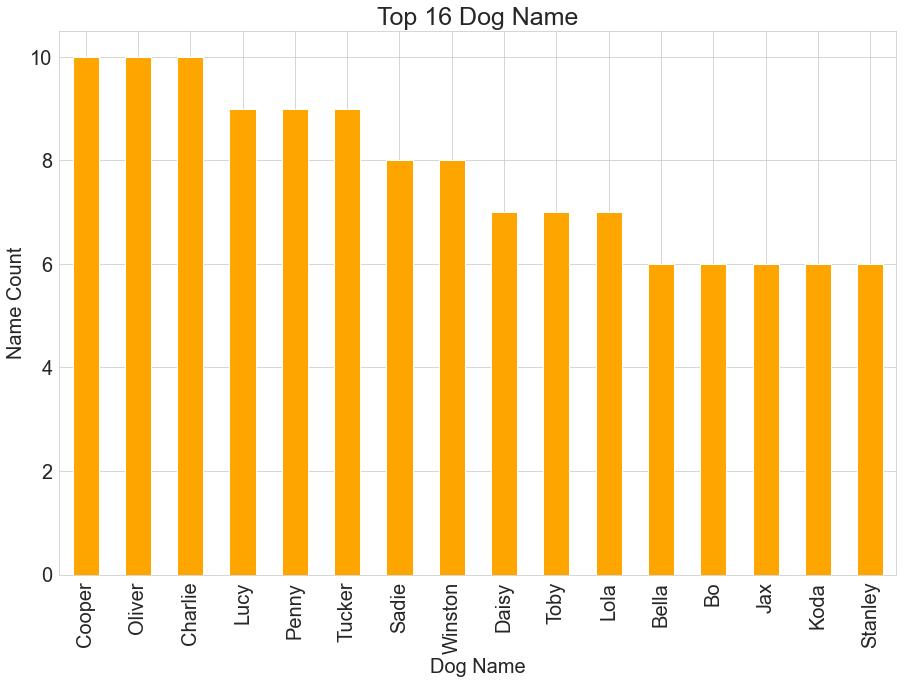

In [716]:
plt.figure(figsize=(15,10))
df_merged_top_names.plot(kind='bar',color=['orange'])
plt.xticks(rotation=90)
plt.title('Top 16 Dog Name', fontsize=25)
plt.xlabel('Dog Name', fontsize=20)
plt.ylabel('Name Count', fontsize=20)
plt.savefig('./Images/top_16_Dog_Name.jpg', bbox_inches="tight")

In [717]:
df_merged_filter[df_merged_filter['name'] == "Cooper"][['name','tweet_id','jpg_url','breed','rating','stage','retweet_count','favorite_count']]

name            tweet_id  \
101   Cooper  868552278524837888   
350   Cooper  814986499976527872   
391   Cooper  808001312164028416   
430   Cooper  798209839306514432   
657   Cooper  757611664640446465   
697   Cooper  751132876104687617   
987   Cooper  708119489313951744   
1022  Cooper  705442520700944385   
1077  Cooper  699801817392291840   
1431  Cooper  676975532580409345   

                                              jpg_url               breed  \
101   https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg             Whippet   
350   https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg           Dalmatian   
391   https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg  Labrador Retriever   
430   https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg            Pekinese   
657   https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg            Bluetick   
697   https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg  Labrador Retriever   
987   https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg     Norwich Terrier   
1022  https://pbs.twimg.com/media/Cco8OmOXIAE0aCu.jpg      Great Pyrenees   
1077  https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg    Golden Retriever   
1431  https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg            Malamute   

      rating    stage  retweet_count  favorite_count  
101      1.2  Unknown           1707            8655  
350      1.1   pupper           1173            7059  
391      1.2  Unknown           3243           11518  
430      1.3  Unknown           2383            9657  
657      1.2  Unknown            991            4172  
697      1.0    puppo           1165            4598  
987      0.9  Unknown            868            2415  
1022     1.2  Unknown           1430            3965  
1077     1.1   pupper            833            2709  
1431     1.1  Unknown            928            2461

### * The first six popular dog name are Cooper, Oliver, Charlie, Lucy, Penny and Tucker

## 2. What are the top 30 most tweeted dog breeds by WeRateDogs?

In [718]:
# Let's consider only the predicted observations for breed and the reliable value < 42 for rating
df_merged_breed_filter=df_merged.query('rating < 42 & breed != "Unpredicted" ')

In [719]:
# Let's group by 'breed' aggregating the count, sort it and select top 30
top_dog_breed=df_merged_breed_filter.groupby('breed').count().rating.sort_values(ascending=True).nlargest(30)
top_dog_breed

breed
Golden Retriever                  156
Labrador Retriever                103
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Samoyed                            41
Pomeranian                         41
Malamute                           33
Cocker Spaniel                     30
Chesapeake Bay Retriever           30
French Bulldog                     30
Miniature Pinscher                 24
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Shih Tzu                           20
Siberian Husky                     20
Beagle                             20
Staffordshire Bullterrier          19
Maltese Dog                        19
Rottweiler                         18
Shetland Sheepdog                  18
Basset                             17
Kuvasz                             17
Italia

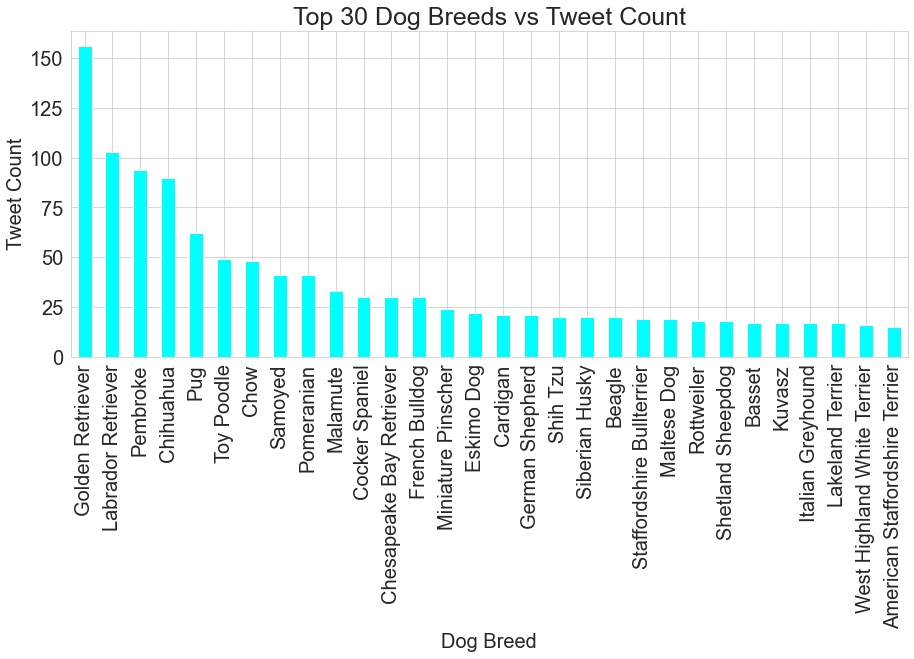

In [720]:
plt.figure(figsize=(15,6))
top_dog_breed.plot(kind='bar', color='cyan')
plt.title('Top 30 Dog Breeds vs Tweet Count', fontsize=25)
plt.xlabel('Dog Breed',fontsize=20)
plt.ylabel('Tweet Count',fontsize=20)
plt.savefig('./Images/top_30_dog_breeds_vs_tweet_count.jpg', bbox_inches="tight")

### * The first 5 common dog breeds are Golden retriver, Labrador Retriever, Pembroke, Chihuahua and Pug

## 3. Which breed of dogs got the highest retweet and favorite counts on average?

In [721]:
df_merged.breed.value_counts()

Unpredicted           304
Golden Retriever      156
Labrador Retriever    103
Pembroke               94
Chihuahua              90
                     ... 
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Silky Terrier           1
Irish Wolfhound         1
Name: breed, Length: 114, dtype: int64

In [722]:
df_merged.breed.shape[0]

1961

In [723]:
df_merged.breed.nunique()

114

#### * There are 1963 tweets for 114 unique breeds in our dataset.

#### * There are many outliers, having very low tweet count

In [724]:
# Let's remove the observations showing rating < 42 and the 'Unpredicted' breed
df_merged_breed_filter=df_merged.query('rating < 42 & breed != "Unpredicted" ')
# Let's select the first 30 rows with the largest values in column 'breed'
df_merged_top_breed=df_merged_breed_filter.breed.value_counts().nlargest(30)
df_merged_top_breed


Golden Retriever               156
Labrador Retriever             103
Pembroke                        94
Chihuahua                       90
Pug                             62
Toy Poodle                      49
Chow                            48
Samoyed                         41
Pomeranian                      41
Malamute                        33
Chesapeake Bay Retriever        30
French Bulldog                  30
Cocker Spaniel                  30
Miniature Pinscher              24
Eskimo Dog                      22
German Shepherd                 21
Cardigan                        21
Shih Tzu                        20
Beagle                          20
Siberian Husky                  20
Staffordshire Bullterrier       19
Maltese Dog                     19
Rottweiler                      18
Shetland Sheepdog               18
Lakeland Terrier                17
Basset                          17
Italian Greyhound               17
Kuvasz                          17
West Highland White 

In [725]:
# Let's a threshold where each breed should have at least the defined number of tweets obtained as
# the ratio between 'Total number of tweets for predicted breed' divided by 
# 'Total number of predicted breeds'
threshold = df_merged_breed_filter.shape[0]/df_merged_breed_filter.breed.nunique()

print(df_merged_breed_filter.shape[0])
print(df_merged_breed_filter.breed.nunique())
threshold

1657
113


14.663716814159292

In [726]:
# Let's filter the breeds based on threshold
filter_breed = df_merged_breed_filter.groupby('breed').count()
filter_breed = filter_breed[filter_breed.rating >= threshold]
filter_breed.tweet_id.unique()

array([ 15,  17,  20,  21,  30,  90,  48,  22, 156, 103,  33,  19,  24,
        94,  41,  62,  18,  49,  16], dtype=int64)

In [727]:
# Let' s now caluclate the average retweet_count for breeds with tweet count more than or equal to threshold
average_retweet = round((df_merged_breed_filter.groupby('breed').sum() / filter_breed).retweet_count.dropna().sort_values(ascending=False) , 0)
average_retweet.head()

breed
French Bulldog    4304.0
Cocker Spaniel    3876.0
Eskimo Dog        3791.0
Samoyed           3723.0
Great Pyrenees    3524.0
Name: retweet_count, dtype: float64

In [728]:
# Calculate the average favorite_count for breeds with tweet count more than or equal to threshold
average_favorite = round((df_merged_breed_filter.groupby('breed').sum() / filter_breed).favorite_count.dropna().sort_values(ascending=False) , 0)
average_favorite.head()


breed
French Bulldog    17002.0
Samoyed           11423.0
Cocker Spaniel    11408.0
Eskimo Dog        10744.0
Cardigan          10613.0
Name: favorite_count, dtype: float64

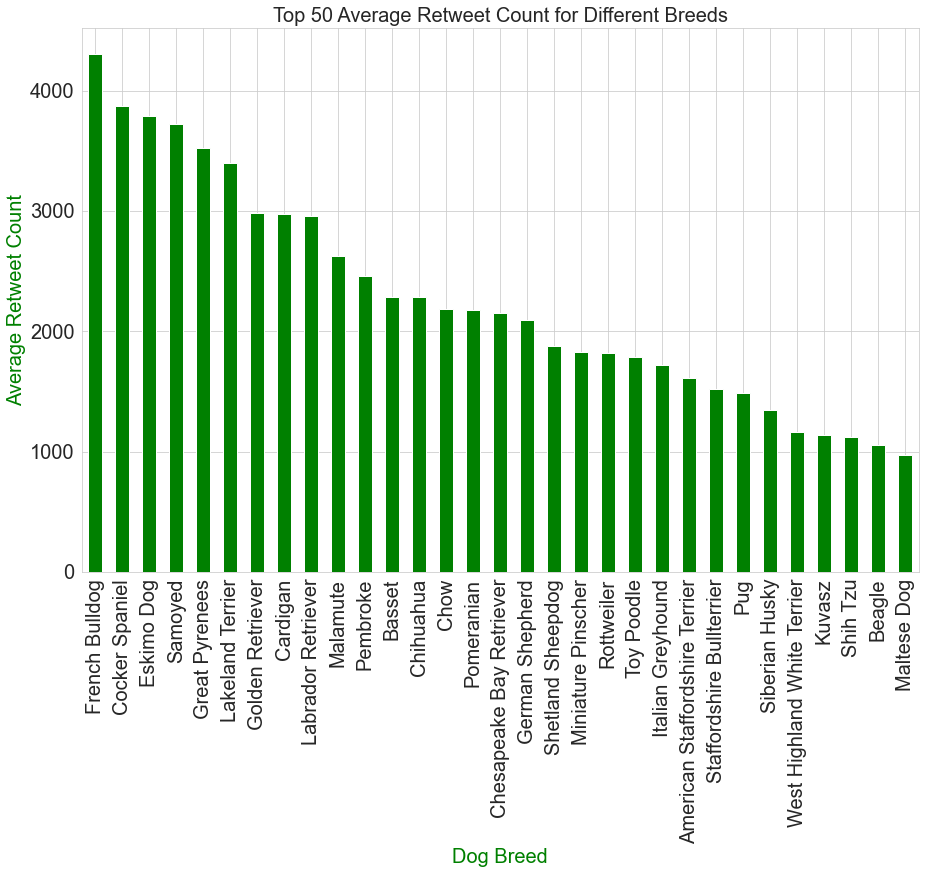

In [729]:
# Plot the top 50 retweet count for different breeds
plt.figure(figsize=(15,10))
average_retweet.nlargest(50).plot(kind='bar', color=['green'])
plt.xticks(rotation=90)
plt.title('Top 50 Average Retweet Count for Different Breeds', fontsize=20)
plt.xlabel('Dog Breed', fontsize=20, color='green')
plt.ylabel('Average Retweet Count',fontsize=20, color='green')
plt.savefig('./Images/Top_50_Average_Retweet_Count_for_Different_Breeds', bbox_inches="tight")

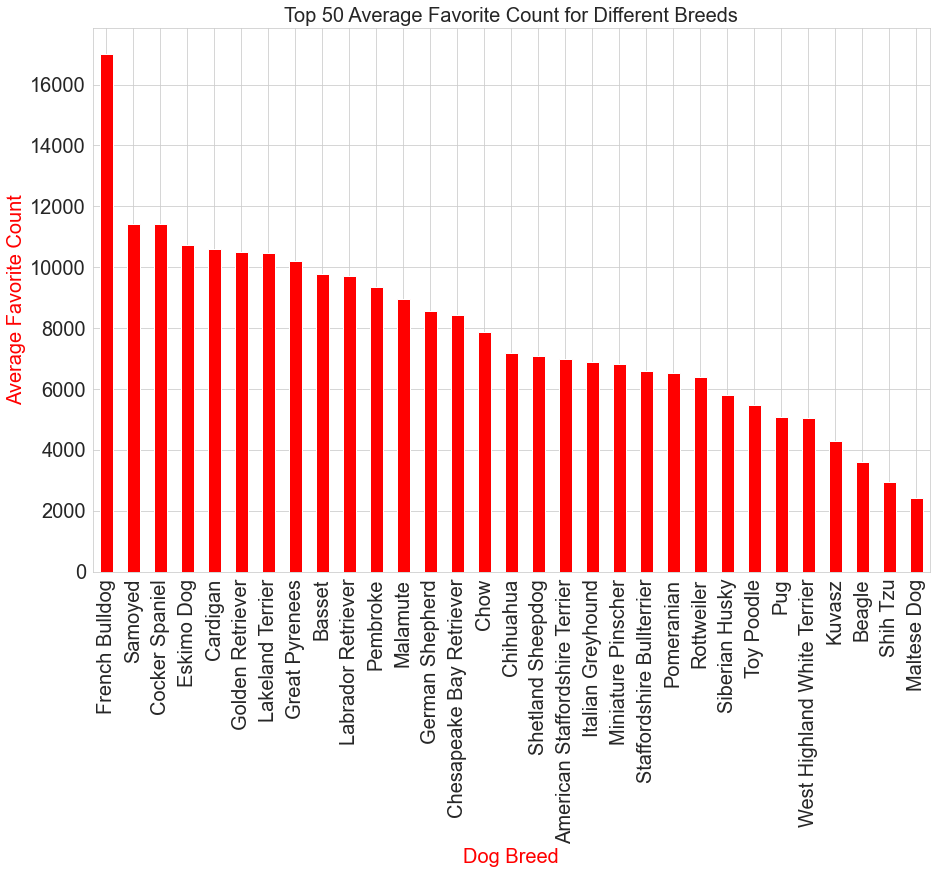

In [730]:
# Plot the top 50 favorite count for different breeds
plt.figure(figsize=(15,10))
average_favorite.nlargest(50).plot(kind='bar', color=['red'])
plt.xticks(rotation=90)
plt.title('Top 50 Average Favorite Count for Different Breeds', fontsize=20)
plt.xlabel('Dog Breed', fontsize=20, color='red')
plt.ylabel('Average Favorite Count', fontsize=20, color='red')
plt.savefig('./Images/Top_50_Average_Favorite_Count_for_Different_Breeds', bbox_inches="tight")

### * French Bulldog results the top breed both with highest average retweet and favorite counts.

In [731]:
df_french_bulldog=df_merged_breed_filter[(df_merged_breed_filter.breed == 'French Bulldog')][['name','tweet_id','jpg_url','breed','rating','stage','retweet_count','favorite_count']].sort_values(by=['retweet_count'], ascending=False)
df_french_bulldog

name            tweet_id  \
107     Jamesy  866450705531457537   
667       None  756288534030475264   
355       Gary  813812741911748608   
99      Walter  868880397819494401   
262        Leo  829501995190984704   
64        Emmy  878057613040115712   
198     George  842163532590374912   
11       Bruno  889880896479866881   
13         Ted  889638837579907072   
130      Milky  859924526012018688   
19      Gerald  888078434458587136   
28      Roscoe  886366144734445568   
457      Maude  793210959003287553   
285       None  826240494070030336   
138      Rosie  857989990357356544   
283      Pawnd  826598365270007810   
1298      Jack  683391852557561860   
118      Quinn  863062471531167744   
632     Albert  761227390836215808   
776     Edmund  742150209887731712   
1058     Bilbo  701889187134500865   
825       None  733482008106668032   
986       None  708130923141795840   
1371      None  679736210798047232   
1348     Brody  680609293079592961   
951   Chuckles  711008018775851008   
1098    Claude  698549713696649216   
1591   Pumpkin  672995267319328768   
1457   Winston  676237365392908289   
1817    Timofy  668627278264475648   

                                              jpg_url           breed  rating  \
107   https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg  French Bulldog     1.3   
667   https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg  French Bulldog     1.2   
355   https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg  French Bulldog     1.4   
99    https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg  French Bulldog     1.4   
262   https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg  French Bulldog     1.2   
64    https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg  French Bulldog     1.4   
198   https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg  French Bulldog     1.2   
11    https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg  French Bulldog     1.3   
13    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg  French Bulldog     1.2   
130   https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg  French Bulldog     1.2   
19    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg  French Bulldog     1.2   
28    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg  French Bulldog     1.2   
457   https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg  French Bulldog     1.0   
285   https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg  French Bulldog     1.1   
138   https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg  French Bulldog     1.2   
283   https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg  French Bulldog     1.3   
1298  https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg  French Bulldog     1.1   
118   https://pbs.twimg.com/media/C_o2vKCUwAAgtOp.jpg  French Bulldog     1.3   
632   https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg  French Bulldog     1.0   
776   https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg  French Bulldog     0.8   
1058  https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg  French Bulldog     1.1   
825   https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg  French Bulldog     1.0   
986   https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg  French Bulldog     1.1   
1371  https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg  French Bulldog     0.9   
1348  https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg  French Bulldog     0.9   
951   https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg  French Bulldog     1.1   
1098  https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg  French Bulldog     0.9   
1591  https://pbs.twimg.com/media/CVb1mRiWcAADBsE.jpg  French Bulldog     0.8   
1457  https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg  French Bulldog     0.8   
1817  https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg  French Bulldog     0.9   

        stage  retweet_count  favorite_count  
107    pupper          29508          105605  
667   Unknown          15943           40053  
355   Unknown          12728           33639  
99    Unknown          11996           56305  
262   Unknown           9563           29020  
64    Unknown           5595         

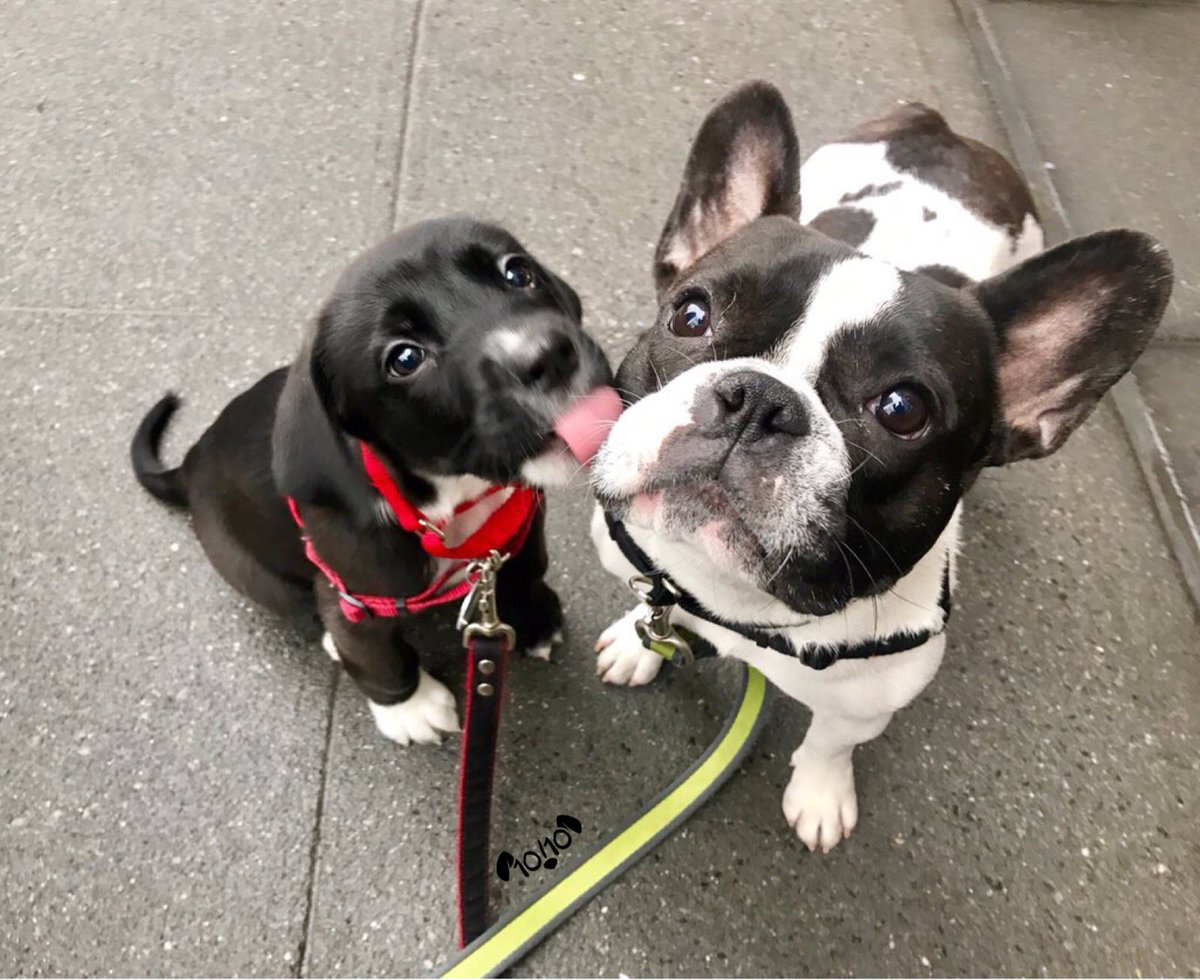

In [732]:
url = df_french_bulldog.jpg_url[107]
r = requests.get(url)
Image.open(BytesIO(r.content))
with Image.open(BytesIO(r.content)) as im:
    im.save('./Images/French_Bulldog.jpg')
Image.open(BytesIO(r.content))


### In the above photo (on the right) Jamesy, a French Bulldog, with highest retweet and favorite count

## 4. Which are the most and least popular dog breeds?

In [733]:
# Let's select the first #50 popular dog breeds
df_most_popular_breed = df_merged_breed_filter.breed.value_counts().nlargest(50)
df_most_popular_breed

Golden Retriever                  156
Labrador Retriever                103
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Samoyed                            41
Pomeranian                         41
Malamute                           33
Chesapeake Bay Retriever           30
French Bulldog                     30
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Cardigan                           21
Shih Tzu                           20
Beagle                             20
Siberian Husky                     20
Staffordshire Bullterrier          19
Maltese Dog                        19
Rottweiler                         18
Shetland Sheepdog                  18
Lakeland Terrier                   17
Basset                             17
Italian Grey

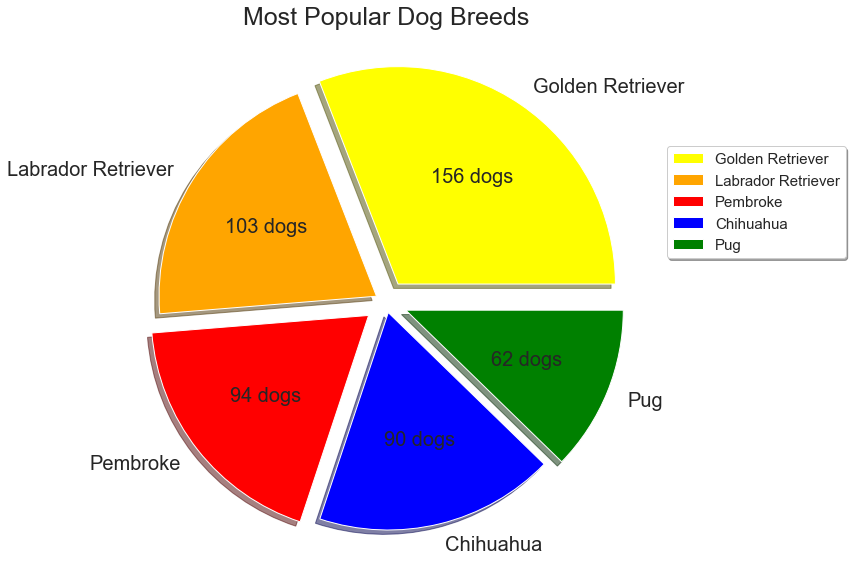

In [734]:
# Let's plot only the first 5 dog breeds
df_most_popular_breed = df_merged_breed_filter.breed.value_counts().nlargest(5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
labels=['Golden Retriever','Labrador Retriever','Pembroke', 'Chihuahua','Pug']
colors=['yellow','orange','red','blue','green']
explode=(0.1,0.05,0.1,0.05,0.1)
wp= {'linewidth': 1, 'edgecolor': 'green'}
ax = plt.pie(x=df_most_popular_breed, labels=labels, explode=explode, colors=colors,
             shadow=True, autopct=lambda p:f'{p*sum(df_most_popular_breed)/100 :.0f} dogs')
plt.title('Most Popular Dog Breeds', fontsize=25)
plt.rcParams['font.size'] = 20
plt.legend(loc='upper right', bbox_to_anchor=(1.36,0.8), shadow=True, framealpha=1, prop={'size':15});
plt.savefig('./Images/Most_Popular_Dog_Breeds', bbox_inches="tight")


### * Golden Retriever is the most popular dog breed relatively to the number of image predictions with 156 dogs. The second most popular dog breed is Labrador Retriever (103 dogs) followed by Pembroke (94 dogs) and Chihuahua (90 dogs). The fifth most popular dog breed is Pug (62 dogs).

In [735]:
# Let's select the last #50 popular dog breeds
df_least_popular_breed = df_merged_breed_filter.breed.value_counts().nsmallest(50)
df_least_popular_breed

Bouvier Des Flandres          1
Clumber                       1
Scotch Terrier                1
Entlebucher                   1
Japanese Spaniel              1
Standard Schnauzer            1
Silky Terrier                 1
Irish Wolfhound               1
Wire Haired Fox Terrier       2
Australian Terrier            2
Appenzeller                   2
Groenendael                   2
Black And Tan Coonhound       2
Sussex Spaniel                2
Brabancon Griffon             3
Irish Water Spaniel           3
Toy Terrier                   3
Curly Coated Retriever        3
Cairn                         3
Briard                        3
Leonberg                      3
Komondor                      3
Afghan Hound                  3
Giant Schnauzer               3
Greater Swiss Mountain Dog    3
Tibetan Terrier               4
Saluki                        4
Tibetan Mastiff               4
Scottish Deerhound            4
Welsh Springer Spaniel        4
Keeshond                      4
Gordon S

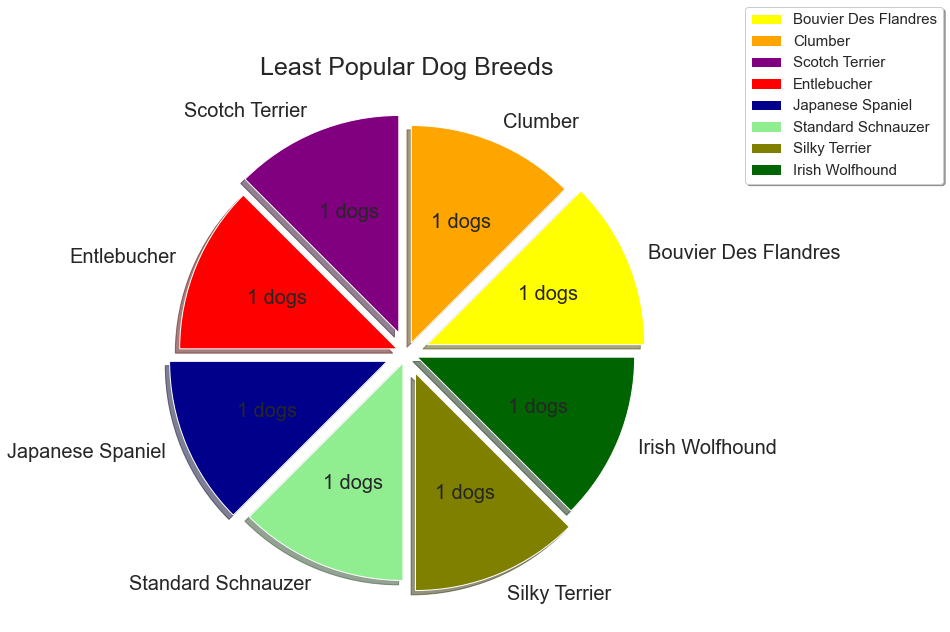

In [736]:
# Let's plot only the last 8 dog breeds
df_least_popular_breed = df_merged_breed_filter.breed.value_counts().nsmallest(8)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
labels=['Bouvier Des Flandres','Clumber','Scotch Terrier', 'Entlebucher','Japanese Spaniel','Standard Schnauzer','Silky Terrier',
       'Irish Wolfhound']
colors=['yellow','orange','purple', 'red','darkblue', 'lightgreen', 'olive','darkgreen']
explode=(0.1,0.05,0.1,0.05,0.1,0.05,0.1,0.05)
wp= {'linewidth': 1, 'edgecolor': 'green'}
ax = plt.pie(x=df_least_popular_breed, labels=labels, explode=explode, colors=colors,
             shadow=True, autopct=lambda p:f'{p*sum(df_least_popular_breed)/100 :.0f} dogs')
plt.title('Least Popular Dog Breeds', fontsize=25)
plt.rcParams['font.size'] = 20
plt.legend(loc='upper right', bbox_to_anchor=(1.50,1.15), frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':15});
plt.savefig('./Images/Least_Popular_Dog_Breeds', bbox_inches="tight")

### * In the above figure the dog breeds with the same lowest number (number of image predictions) equal to 1 are reported.

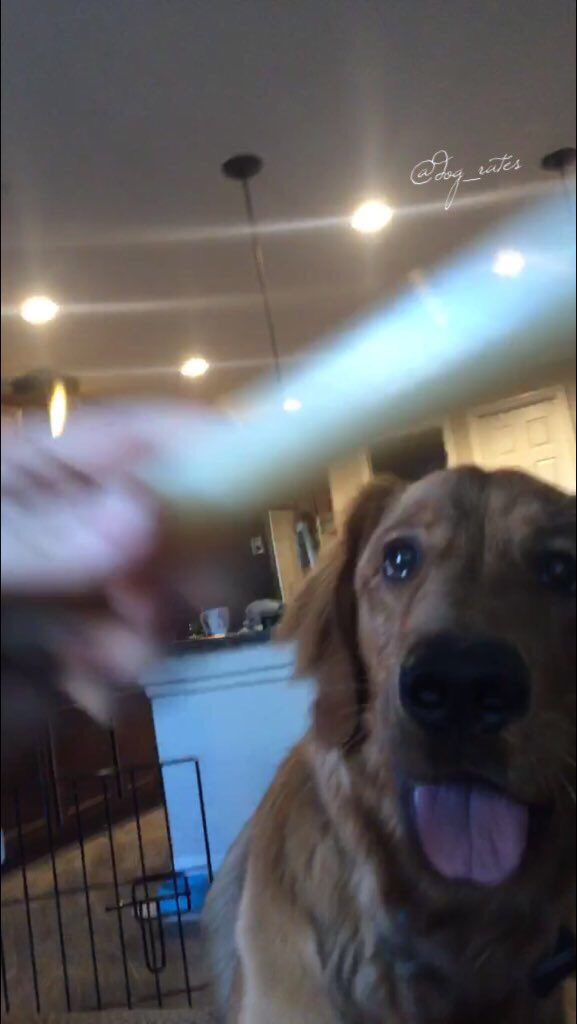

In [760]:
df_merged_filter[(df_merged_filter.breed == 'Golden Retriever') & ((df_merged_filter.name == 'Cooper'))][['name','tweet_id','jpg_url','breed','rating','stage']]
url = df_merged.jpg_url[1077]
r = requests.get(url)
with Image.open(BytesIO(r.content)) as im:
    im.save('./Images/Cooper_Golden_Retriever.jpg')
Image.open(BytesIO(r.content))


###  In the above photo Cooper (the most common dog name), a Golden Retriever.

In [738]:
df_golden_retriever=df_merged_breed_filter[(df_merged_breed_filter.breed == 'Golden Retriever')][['name','tweet_id','jpg_url','breed','rating','stage','retweet_count','favorite_count']].sort_values(by=['retweet_count'],ascending=False)
df_golden_retriever

name            tweet_id  \
92       Zoey  870374049280663552   
442      None  795464331001561088   
827      None  733109485275860992   
1489     None  675354435921575936   
438      Ruby  796149749086875649   
...       ...                 ...   
1952     None  666057090499244032   
1834    Rusty  668286279830867968   
1783     None  669327207240699904   
1899  Bradlay  667160273090932737   
1907     None  667044094246576128   

                                                                                      jpg_url  \
92                                            https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg   
442   https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg   
827                                           https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
1489  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
438                                           https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
...                                                                                       ...   
1952                                          https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
1834                                          https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg   
1783                                          https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg   
1899                                          https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg   
1907                                          https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg   

                 breed  rating         stage  retweet_count  favorite_count  
92    Golden Retriever     1.3       Unknown          22053           71199  
442   Golden Retriever     1.3         doggo          21507           45597  
827   Golden Retriever     1.2  doggo,pupper          15219           48066  
1489  Golden Retriever     1.3       Unknown          14638           28924  
438   Golden Retriever     1.1       Unknown          13073           29685  
...                ...     ...           ...            ...             ...  
1952  Golden Retriever     0.9       Unknown            111             245  
1834  Golden Retriever     1.1       Unknown            109             427  
1783  Golden Retriever     1.3       Unknown             98             486  
1899  Golden Retriever     1.1       Unknown             50             213  
1907  Golden Retriever     1.2       Unknown             43             158  

[156 rows x 8 columns]

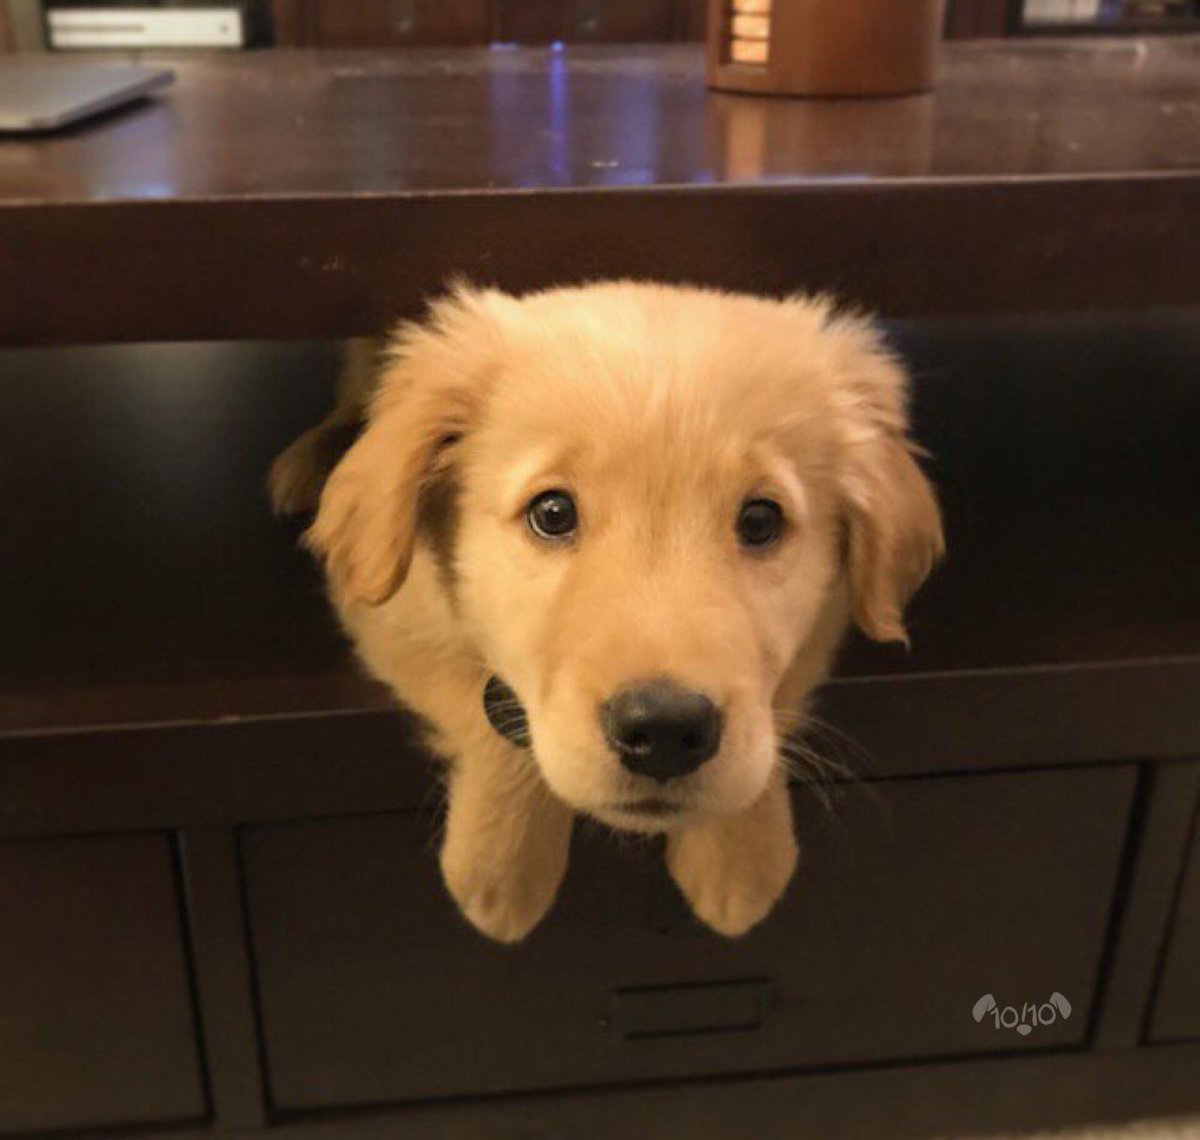

In [739]:
url = df_merged.jpg_url[92]
r = requests.get(url)
with Image.open(BytesIO(r.content)) as im:
    im.save('./Images/Zoey_Golden_Retriever.jpg')
Image.open(BytesIO(r.content))

### In the above photo Zoey, a representative of Golden Retriever

## 5. Which are the most common dog stages?

In [740]:
df_merged.stage.shape[0]

1961

In [741]:
df_merged.stage.nunique()

7

In [742]:
# Let's check the lowest tweet count for each stage
df_merged.groupby('stage').count().rating.sort_values(ascending=True)

stage
doggo,floofer       1
doggo,pupper        4
floofer             7
puppo              23
doggo              64
pupper            203
Unknown          1659
Name: rating, dtype: int64

#### * There are 1963 tweets for 7 unique stage in our dataframe.
#### * There are many outliers without info about the stage

In [743]:
# Let's filter the dataset by excluding the 'Unknown' stage
df_merged_stage_filter=df_merged.query('stage != "Unknown" ')
# Counts of unique values for stages
df_merged_top_stage=df_merged_stage_filter.stage.value_counts()
# Let's use  head() function  to get the first #4 rows.
df_dog_stage=df_merged_top_stage.head(4)

df_dog_stage

pupper     203
doggo       64
puppo       23
floofer      7
Name: stage, dtype: int64

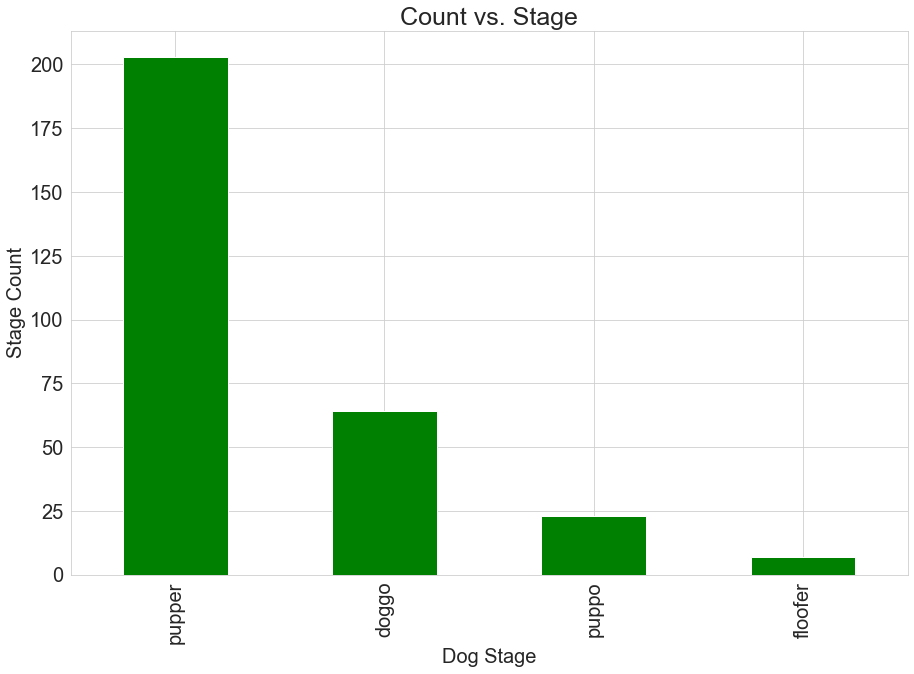

In [744]:
plt.figure(figsize=(15,10))
df_dog_stage.plot(kind='bar',color=['green'])
plt.xticks(rotation=90)
plt.title('Count vs. Stage', fontsize=25)
plt.xlabel('Dog Stage', fontsize=20)
plt.ylabel('Stage Count', fontsize=20)
plt.savefig('./Images/Count_vs_Stage.jpg', bbox_inches="tight")

### * The most common dog stage per frequency is pupper

## 6. Which dog stage shows the highest retweet, favorite and rating counts on average?

In [745]:
df_merged_stage_filter.stage.value_counts()

pupper           203
doggo             64
puppo             23
floofer            7
doggo,pupper       4
doggo,floofer      1
Name: stage, dtype: int64

In [746]:
# Let's calculate the frequency of different dog breeds
dict_frequency = df_merged_stage_filter['stage'].value_counts().to_dict()
# Let's convert the dictionary to a dataframe including the main dog breeds sorted per frequency 
df_frequency= pd.DataFrame(list(dict_frequency.items()), columns=['stage', 'frequency']).head(4)

print(dict_frequency)
df_frequency

{'pupper': 203, 'doggo': 64, 'puppo': 23, 'floofer': 7, 'doggo,pupper': 4, 'doggo,floofer': 1}


stage  frequency
0   pupper        203
1    doggo         64
2    puppo         23
3  floofer          7

### Below is presented the used function 'stage'

In [747]:
# As following the arguments of the function:
# x: the dictionary containing the frequency of each dog breed
# y: corresponding dataframe from the dictionary x
# z: the baseline dataframe
# z1: interested colum
# y1: new column with the sum of the values at the interested column for ech dog stage
# y2: mean value derived by total number / dog stage frequency

def stage(x,y,z,z1,y1,y2):
        x
        y
        tot_retwt =[]
        for i in y['stage']:
            t_r = z[z['stage'] == i][z1].sum()
            tot_retwt.append(t_r)
        y[y1]=tot_retwt
        # Calculating the mean
        y[y2]=y[y1]/y['frequency']
        return(y)

### 1. Stages vs Average Retweets

In [748]:
# Let's call the function 'stage' to generate new column 'average_retweet'
df_stage=df_merged_stage_filter
stage(dict_frequency,df_frequency,df_stage,'retweet_count', 'total_retweet', 'average_retweet')

stage  frequency  total_retweet  average_retweet
0   pupper        203         382596      1884.709360
1    doggo         64         365256      5707.125000
2    puppo         23         130022      5653.130435
3  floofer          7          27265      3895.000000

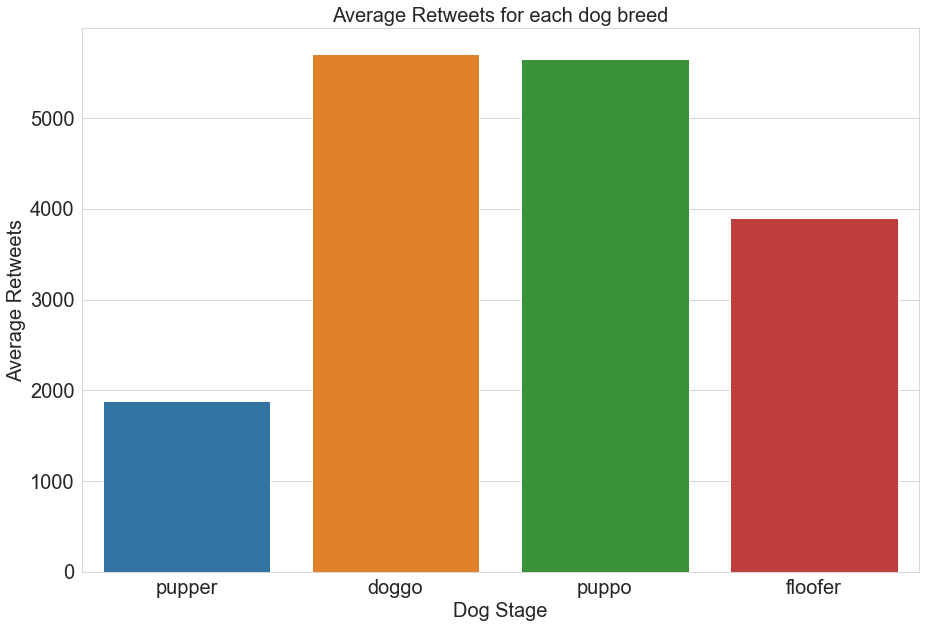

In [749]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="average_retweet", data=df_frequency)
g.set_ylabel('Average Retweets', fontsize=20)

plt.title('Average Retweets for each dog breed', fontsize=20)
plt.xlabel('Dog Stage', fontsize=20)
plt.savefig('./Images/Average_Retweets_for_each_dog_breed.jpg', bbox_inches="tight")

### 2. Stages vs Average Favorites

In [750]:
# Let's call the function 'stage' to generate new column 'average_favorite'
stage(dict_frequency,df_frequency,df_stage,'favorite_count', 'total_favorite', 'average_favorite')

stage  frequency  total_retweet  average_retweet  total_favorite  \
0   pupper        203         382596      1884.709360         1238060   
1    doggo         64         365256      5707.125000         1071506   
2    puppo         23         130022      5653.130435          457551   
3  floofer          7          27265      3895.000000           76373   

   average_favorite  
0       6098.817734  
1      16742.281250  
2      19893.521739  
3      10910.428571

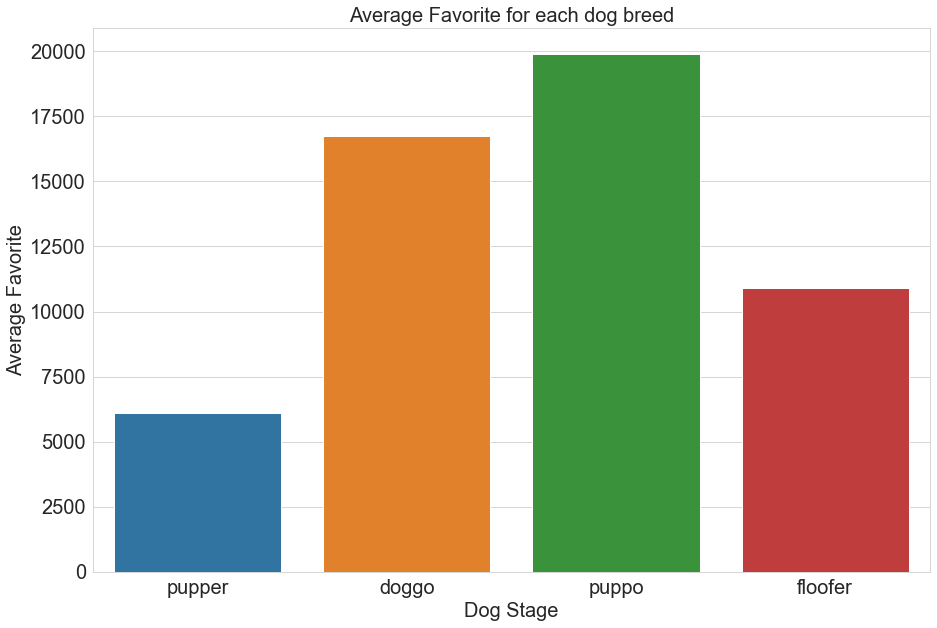

In [751]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="average_favorite", data=df_frequency)
g.set_ylabel('Average Favorite', fontsize=20)

plt.title('Average Favorite for each dog breed', fontsize=20)
plt.xlabel('Dog Stage', fontsize=20)
plt.savefig('./Images/Average_Favorite_for_Each_dog_breed.jpg', bbox_inches="tight")

### 3. Stages vs Average Rating

In [752]:
# Let's call the function 'stage' to generate new column 'average_rating'
stage(dict_frequency,df_frequency,df_stage,'rating', 'total_rating', 'average_rating')

stage  frequency  total_retweet  average_retweet  total_favorite  \
0   pupper        203         382596      1884.709360         1238060   
1    doggo         64         365256      5707.125000         1071506   
2    puppo         23         130022      5653.130435          457551   
3  floofer          7          27265      3895.000000           76373   

   average_favorite  total_rating  average_rating  
0       6098.817734       216.327        1.065650  
1      16742.281250        75.100        1.173438  
2      19893.521739        27.700        1.204348  
3      10910.428571         8.400        1.200000

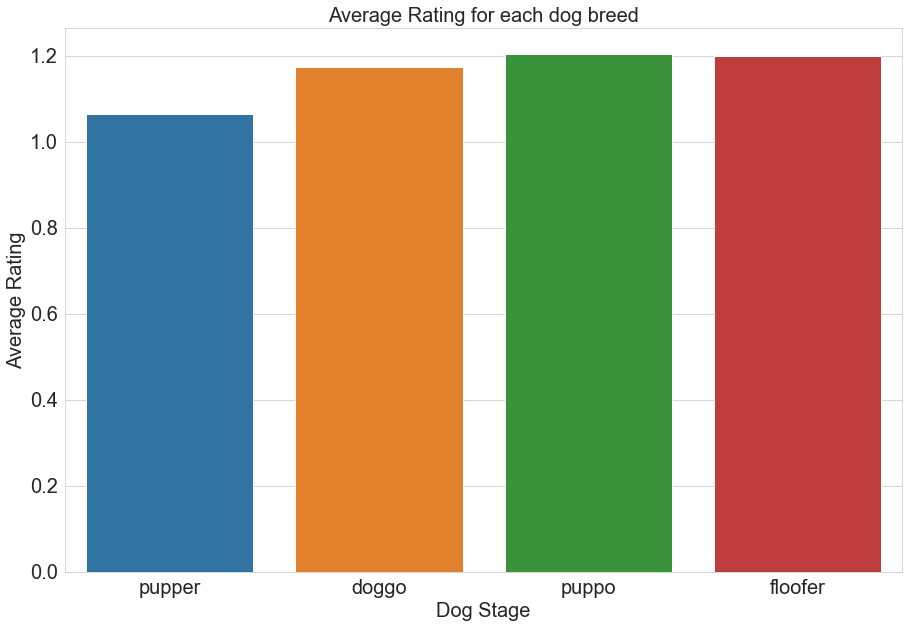

In [753]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="average_rating", data=df_frequency)
g.set_ylabel('Average Rating', fontsize=20)

plt.title('Average Rating for each dog breed', fontsize=20)
plt.xlabel('Dog Stage', fontsize=20)
plt.savefig('./Images/Average_Rating_for_each_dog_breed.jpg', bbox_inches="tight")

### * The most rated & favorited dog stage is puppo

###  * The most retweeted dog stage is doggo

In [754]:
df_puppo=df_merged_breed_filter[(df_merged_breed_filter.stage == 'puppo')][['name','tweet_id','jpg_url','breed','rating','stage','favorite_count','retweet_count']].sort_values(by=['retweet_count'], ascending=False)
df_puppo

name            tweet_id  \
302       None  822872901745569793   
290       None  825535076884762624   
145       None  855851453814013952   
78   Sebastian  874012996292530176   
12        None  889665388333682689   
458       Lily  793195938047070209   
473      Betty  790946055508652032   
62      Snoopy  878776093423087618   
686       None  752519690950500352   
405      Diogi  803773340896923648   
491      Tonks  787717603741622272   
412       Loki  802239329049477120   
104     Shikha  867421006826221569   
14      Stuart  889531135344209921   
668       None  756275833623502848   
799     Bayley  738537504001953792   
132       None  859607811541651456   
697     Cooper  751132876104687617   
292      Pablo  825026590719483904   
768       Kilo  743253157753532416   
319     Oliver  819952236453363712   
757       Abby  744995568523612160   

                                             jpg_url  \
302  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
290  https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg   
145  https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg   
78   https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg   
12   https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
458  https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg   
473  https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
62   https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg   
686  https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg   
405  https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg   
491  https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg   
412  https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg   
104  https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg   
14   https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
668  https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg   
799  https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg   
132  https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg   
697  https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg   
292  https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg   
768  https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg   
319  https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg   
757  https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg   

                              breed  rating  stage  favorite_count  \
302                Lakeland Terrier     1.3  puppo          120349   
290                      Rottweiler     1.4  puppo           52011   
145           Flat Coated Retriever     1.3  puppo           40256   
78                         Cardigan     1.3  puppo           29182   
12                         Pembroke     1.3  puppo           40810   
458              Labrador Retriever     1.2  puppo           14068   
473                Golden Retriever     1.2  puppo           15405   
62                Italian Greyhound     1.3  puppo           16558   
686              Labrador Retriever     1.1  puppo            6660   
405              Miniature Pinscher     1.2  puppo            9292   
491                 German Shepherd     1.3  puppo            9421   
412                      Eskimo Dog     1.2  puppo            8415   
104                      Eskimo Dog     1.2  puppo           13884   
14                 Golden Retriever     1.3  puppo           12950   
668                        Airedale     1.0  puppo            5815   
799                            Chow     1.1  puppo            4583   
132                Golden Retriever     1.3  puppo           16323   
697              Labrador Retriever     1.0  puppo            4598   
292                      Eskimo Dog     1.2  puppo            5737   
768                        Malamute     1.0  puppo            3827   
319  American Staffordshire Terrier     1.3  puppo            4880   
757            Old English Sheepdog     0.9  puppo            2662   

     retweet_count  
302          38985  
290          15869  
145          15599  
78            8404  
12            8173  
458           5190  
473           4295  
62            3353  
686           3074  
405           2537  
491 

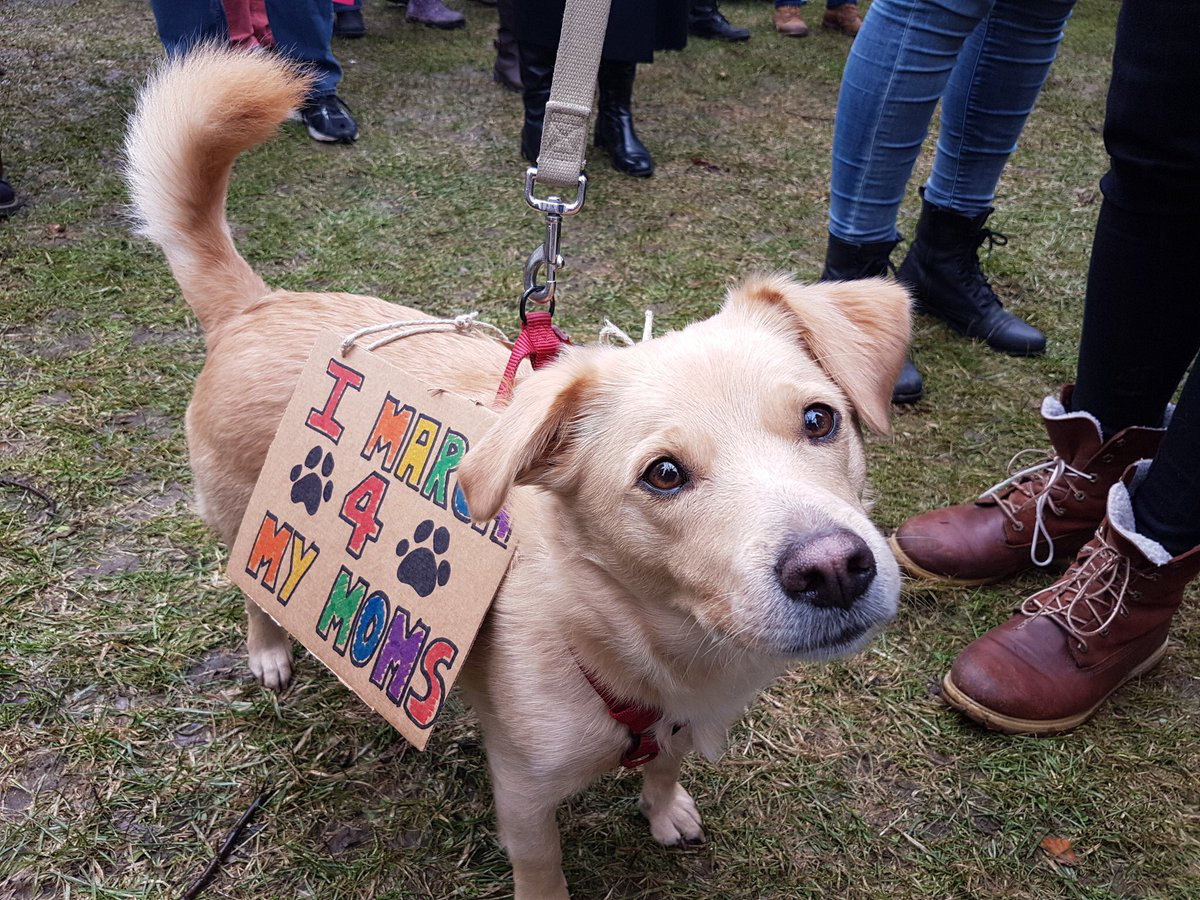

In [755]:
url = df_puppo.jpg_url[302]
r = requests.get(url)
with Image.open(BytesIO(r.content)) as im:
    im.save('./Images/puppo_Lakeland_Terrier.jpg')
Image.open(BytesIO(r.content))

### In the above photo a puppo of Lakeland Terrier with highest favorite and retweet count

In [756]:
df_doggo=df_merged_breed_filter[(df_merged_breed_filter.stage == 'doggo')][['name','tweet_id','jpg_url','breed','rating','stage','favorite_count','retweet_count']].sort_values(by=['favorite_count'], ascending=False)
df_doggo

name            tweet_id  \
761      None  744234799360020481   
796      None  739238157791694849   
326        Bo  819004803107983360   
442      None  795464331001561088   
182    Barney  846514051647705089   
282     Cupid  826848821049180160   
9      Cassie  890240255349198849   
81       None  872967104147763200   
249   Emanuel  831939777352105988   
281      Loki  826958653328592898   
220     Meera  836753516572119041   
37       Yogi  884162670584377345   
88   Napolean  871515927908634625   
284     Pilot  826476773533745153   
248    Miguel  832032802820481025   
520   Sampson  782305867769217024   
135      None  858843525470990336   
97      Scout  869596645499047938   
232      None  834574053763584002   
242     Rhino  832998151111966721   
271   Doobert  828381636999917570   
363      None  813127251579564032   
311  Sundance  821407182352777218   
247    Smiley  832273440279240704   
649      None  758828659922702336   
498     Rizzo  786363235746385920   
365     Rocky  813096984823349248   
263      None  829449946868879360   
313      None  821107785811234820   
354    Chubbs  813910438903693312   
358      None  813202720496779264   
254      Pete  831322785565769729   
424      Sobe  799757965289017345   
309   Duchess  821765923262631936   
831      Kyle  732375214819057664   
436      None  796484825502875648   
517    Deacon  782747134529531904   
187    Mimosa  845397057150107648   
558    Finley  775364825476165632   
753     Lenox  745433870967832576   
912      None  716080869887381504   
684      None  752682090207055872   
660      None  757393109802180609   
723    Divine  748932637671223296   
854      None  727644517743104000   
286      None  826204788643753985   
887      None  719991154352222208   
692      None  751583847268179968   
685      None  752660715232722944   
687      None  752334515931054080   
634    Wishes  760893934457552897   
818   Kellogg  735256018284875776   
712     Piper  750011400160841729   
867      None  724771698126512129   

                                                                                     jpg_url  \
761  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg   
796  https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg   
326                                          https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   
442  https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg   
182                                          https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg   
282                                          https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg   
9                                            https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
81                                           https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg   
249                                          https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg   
281                                          https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg   
220                                          https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg   
37                                           https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   
88                                           https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg   
284                                          https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg   
248                                          https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg   
520                                          https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg   
135                                          https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg   
97                                           https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg   
232                                          https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg   
242                                          https://

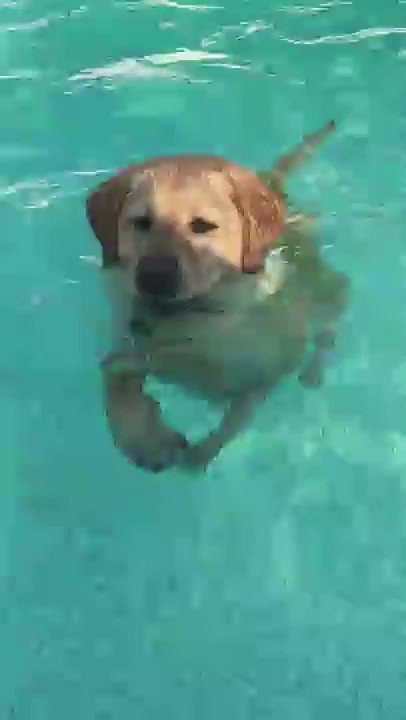

In [757]:
url = df_doggo.jpg_url[761]
r = requests.get(url)
with Image.open(BytesIO(r.content)) as im:
    im.save('./Images/doggo_Labrador_Retriever.jpg')
Image.open(BytesIO(r.content))

### In the above photo a doggo of Labrador Retriever with highest favorite_count and retweet_count

## 7. Which is the relationship between Retweet and Favorite Count?

In [758]:
# Correlation between Retweet and Favorite
# In order to measure correlation, we usually use the Pearson correlation coefficient, 
# it gives an estimate of the correlation between two variables. Pearson’s correlation coefficient is good 
# to measure linear correlation. 

# .corr() by default will use Pearson’s coefficient
# 
# Reference: https://data36.com/correlation-definition-calculation-corr-pandas/

df_merged[['retweet_count','favorite_count']].corr().style.background_gradient(cmap='coolwarm')

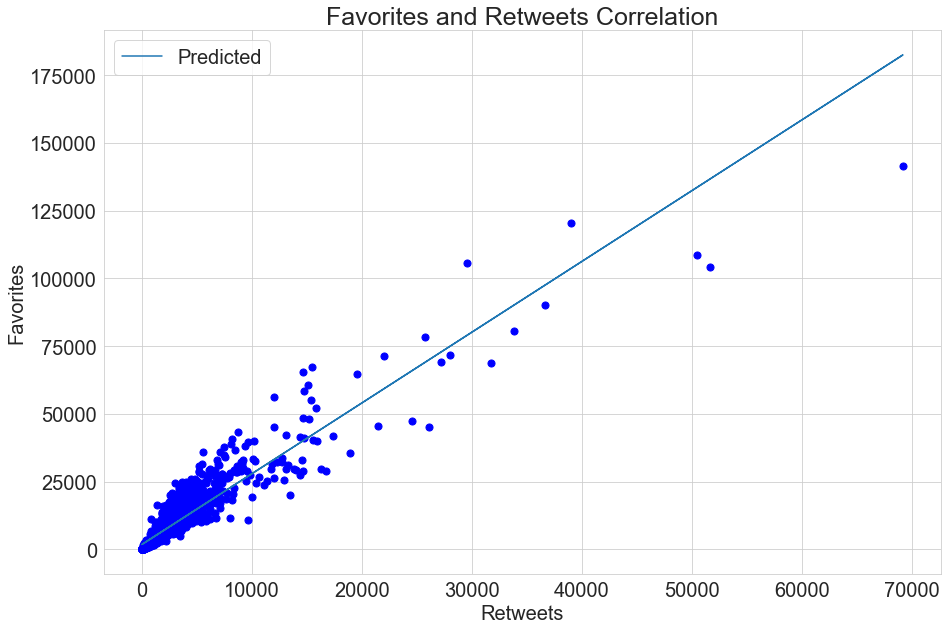

In [759]:
# Reference: https://www.reneshbedre.com/blog/pandas-scatterplot.html

X = np.array(df_merged['retweet_count']).reshape(-1, 1)
y = np.array(df_merged['favorite_count'])
# fit the model
reg = LinearRegression().fit(X, y)
df_merged['Predicted'] = reg.predict(X)

fig, ax = plt.subplots(figsize=(15,10))
df_merged.plot.scatter(x = 'retweet_count', y = 'favorite_count', s = 50,  marker = 'o', c = 'blue', ax = ax)
df_merged.plot.line(x = 'retweet_count', y = 'Predicted', ax = ax)

plt.title("Favorites and Retweets Correlation", fontsize=25)
plt.xlabel('Retweets', fontsize=20)
plt.ylabel('Favorites', fontsize=20)

plt.savefig('./Images/Favorites_and_Retweets_Correlation', bbox_inches="tight")

### * Retweets and Favorites are highly correlated

<a id='conclusions'></a>
# Conclusions

Data Wrangling was carried out and the below conclusions are drawn based on the wrangled data:

1. The first six popular dog names are Cooper, Oliver, Charlie, Lucy, Penny and Tucker
2. The first five common dog breeds are Golden retriver, Labrador Retriever, Pembroke, Chihuahua and Pug
3. French Bulldog results the top breed both with highest average retweet and favorite counts.
4. Golden Retriever is the most popular dog breed relatively to the number of image predictions with 156 dogs. The second most 
  popular dog breed is Labrador Retriever (103 dogs) followed by Pembroke (94 dogs) and Chihuahua (90 dogs). The fifth most 
  popular dog breed is Pug (62 dogs).
5. The most common dog stage per frequency is pupper
6. The most rated & favorited dog stage is puppo and the most retweeted dog stage is doggo
7. Retweets and Favorites are highly correlated